In [142]:

#from sklearn.cluster import KMeans
import wget
import pandas as pd

from os import path

# inicializamos un diccionario donde guardaremos el dataset
dataset = dict()
dataset['url'] = 'https://ignaciorlando.github.io/datasets/data-science/Life-Expectancy-Data-Updated.csv'
dataset['extension'] = '.csv'
dataset['filename'] = 'life_expectancy' + dataset['extension']
if not path.exists(dataset['filename']):  # descargar solamente si no existe
  wget.download(dataset['url'], dataset['filename'])
else:
  print('El archivo {} ya existe.'.format(dataset['filename']))

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')
original_table.head()

El archivo life_expectancy.csv ya existe.


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


 Agrupar los países utilizando el algoritmo de K-means, utilizando un valor de
K dado. ¿Qué hipótesis pueden derivarse del clustering realizado? Recordar
que este algoritmo sólo está definido para variables cuantitativas.


In [143]:
#Hagamos una copia
copy_dataset =  original_table.copy()
#Quedemonos con los datos de 2012
copy_dataset = copy_dataset[copy_dataset['Year'] == 2012]

In [144]:
#Analicemos valores por si hay y hay y los borramos
copy_dataset = copy_dataset.dropna(axis=1)
#Hya columnas que se pueden obviar
copy_dataset['Developed'] = 0
copy_dataset['Developed'] = copy_dataset['Economy_status_Developed'].apply(lambda x: 1 if x == 1 else 0)
copy_dataset = copy_dataset.drop('Economy_status_Developed', axis=1)
copy_dataset = copy_dataset.drop('Economy_status_Developing', axis=1)


In [145]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = copy_dataset.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
copy_dataset[numeric_cols] = scaler.fit_transform(copy_dataset[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
copy_dataset.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Developed
4,Israel,Middle East,0.0,0.014184,0.012388,0.015365,0.170401,0.966102,0.878049,0.573913,0.912281,0.933333,0.004450,0.323282,0.005775,0.041045,0.036364,0.904762,0.960784,1.0
10,Brazil,South America,0.0,0.135765,0.101170,0.208701,0.419811,0.949153,0.646341,0.495652,0.947368,0.946667,0.014622,0.083883,0.147109,0.100746,0.098182,0.468254,0.750700,0.0
19,Gabon,Africa,0.0,0.375887,0.375774,0.432172,0.440448,0.711864,0.573171,0.391304,0.666667,0.773333,0.099174,0.065874,0.001226,0.231343,0.221818,0.507937,0.434174,0.0
33,Jordan,Middle East,0.0,0.143870,0.113558,0.131304,0.021226,0.983051,0.963415,0.721739,0.982456,0.986667,0.007629,0.039052,0.005908,0.141791,0.138182,0.674603,0.736695,0.0
34,Eritrea,Africa,0.0,0.352584,0.335169,0.468103,0.060731,0.915254,0.865854,0.017391,0.912281,0.933333,0.010807,0.003648,0.002356,0.320896,0.309091,0.198413,0.442577,0.0


# ```Cuantos clusters conviene?```

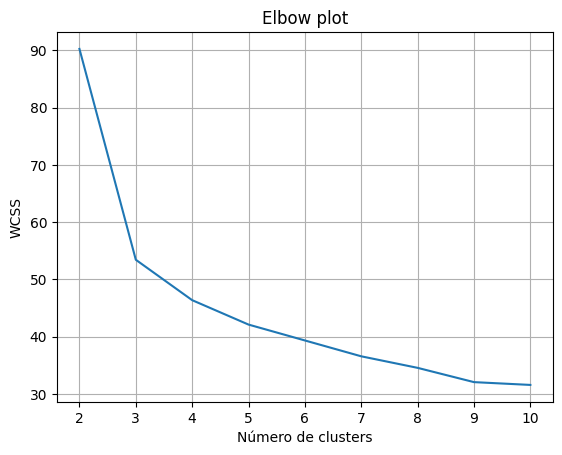

In [146]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# separamos las features de los nombres de los países
countries = copy_dataset['Country']
features_data_2012 = copy_dataset.drop(columns=['Country', 'Year', 'Region'])

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_data_2012)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Conviene usar 3, 4 o 5 clusters

# ```3 clusters```

In [147]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=3, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_data_2012)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_3 = kmeans.predict(features_data_2012)
print(clusters_kmeans_3)


[1 0 2 0 2 2 0 0 2 0 0 0 0 2 1 1 0 2 1 0 0 2 0 1 2 2 0 0 2 0 1 2 1 0 1 0 0
 1 0 0 1 0 0 2 0 1 0 1 2 0 2 0 2 0 0 0 1 1 0 1 2 2 0 0 2 0 1 0 0 1 2 0 2 0
 0 1 0 1 0 1 2 0 0 2 2 0 1 0 0 0 2 0 2 0 1 0 0 0 1 0 2 0 2 1 0 0 2 1 1 1 2
 1 0 0 0 0 2 2 0 2 0 0 0 0 2 2 2 2 0 0 0 2 2 2 1 0 0 2 0 0 0 0 2 0 2 2 0 2
 1 1 2 1 0 2 0 2 0 2 1 0 2 0 2 1 2 1 2 1 2 0 0 0 0 0 0 1 2 0 2]


In [148]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Country': countries, 'Cluster': clusters_kmeans_3})

# Imprimimos los países de cada cluster
for cluster_num in range(3):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Country'].tolist())


Cluster 0:
['Brazil', 'Jordan', 'Kyrgyz Republic', 'Armenia', 'St. Lucia', 'Philippines', 'Bhutan', 'Azerbaijan', 'Guatemala', 'Belarus', 'Micronesia, Fed. Sts.', 'St. Vincent and the Grenadines', 'Turkmenistan', 'Turkiye', 'Bahrain', 'Dominican Republic', 'Indonesia', 'Bosnia and Herzegovina', 'Serbia', 'Argentina', 'Rwanda', 'Algeria', 'Sao Tome and Principe', 'Costa Rica', 'Cuba', 'Samoa', 'Nicaragua', 'Oman', 'Mongolia', 'Venezuela, RB', 'Solomon Islands', 'Seychelles', 'Botswana', 'Qatar', 'Panama', 'Bolivia', 'Grenada', 'Egypt, Arab Rep.', 'Cabo Verde', 'Mauritius', 'Tonga', 'Bahamas, The', 'Fiji', 'Colombia', 'Kuwait', 'Honduras', 'Kiribati', 'Kazakhstan', 'Uruguay', 'Thailand', 'Moldova', 'Lebanon', 'Brunei Darussalam', 'Saudi Arabia', 'China', 'Libya', 'Suriname', 'Mexico', 'Maldives', 'Vanuatu', 'Sri Lanka', 'Tajikistan', 'Peru', 'Paraguay', 'Guyana', 'Russian Federation', 'United Arab Emirates', 'Antigua and Barbuda', 'Georgia', 'Vietnam', 'El Salvador', 'Iran, Islamic Rep.

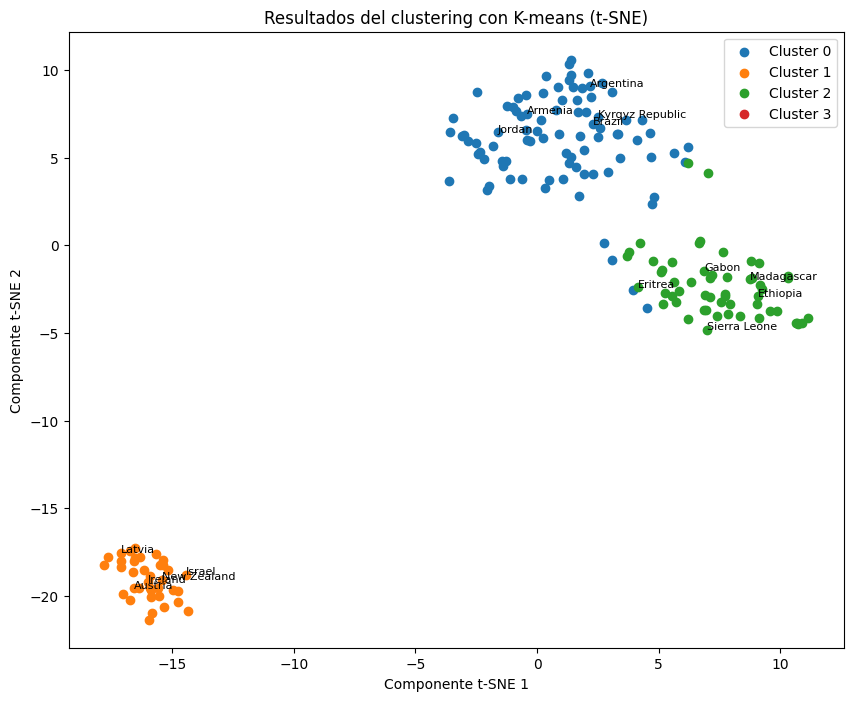

In [149]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_data_2012)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_3, 'Country': countries})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

Por lo que se ve con un k = 3 se juntan todos los paises desarrollados en el cluster 1 y estan muy alejados demas. En el cluster 0 estan los pairses en desarrollo como nostros pero que no estan taaan mal como los del luster 3 que ya son paises que estan en guerra, de africa o que tienen condiciones sanitarias pesimas como india.

#  ```4 clusters```

In [150]:
#Inicializamos k
k = 4
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=k, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_data_2012)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_4 = kmeans.predict(features_data_2012)
print(clusters_kmeans_4)

[1 3 0 3 0 2 3 3 2 3 0 0 3 2 1 1 3 2 1 3 3 2 3 1 0 2 3 3 0 3 1 0 1 3 1 3 3
 1 3 3 1 0 3 0 3 1 3 1 2 3 2 3 2 3 3 3 1 1 3 1 2 2 3 3 2 0 1 3 3 1 2 3 0 3
 3 1 3 1 3 1 0 3 3 2 0 3 1 3 3 3 2 3 0 3 1 3 3 3 1 3 2 3 2 1 3 3 2 1 1 1 2
 1 3 0 3 3 0 2 3 0 3 3 3 3 0 0 2 0 3 3 3 2 2 0 1 3 3 0 0 3 3 3 0 3 2 0 3 0
 1 1 0 1 3 0 3 0 3 0 1 3 2 3 2 1 0 1 2 1 2 3 3 3 3 3 3 1 2 3 2]


In [151]:
# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Country': countries, 'Cluster': clusters_kmeans_4})

# Imprimimos los países de cada cluster
for cluster_num in range(k):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Country'].tolist())


Cluster 0:
['Gabon', 'Eritrea', 'Philippines', 'Bhutan', 'Uganda', 'India', 'Burundi', 'Rwanda', 'Comoros', 'Botswana', 'Tanzania', 'Zimbabwe', 'Cambodia', 'Cameroon', 'Suriname', 'Togo', 'Kenya', 'Burkina Faso', 'Bangladesh', 'Ghana', 'Nepal', 'Guinea-Bissau', 'Vietnam', 'Lesotho', 'Malawi', 'Namibia', 'Gambia, The', 'Eswatini', 'Timor-Leste', 'Senegal', 'Lao PDR']

Cluster 1:
['Israel', 'Latvia', 'New Zealand', 'Austria', 'Ireland', 'Finland', 'United States', 'Czechia', 'Italy', 'Germany', 'Canada', 'Slovenia', 'Greece', 'Sweden', 'Iceland', 'Slovak Republic', 'Estonia', 'Spain', 'Denmark', 'United Kingdom', 'Switzerland', 'Australia', 'Hungary', 'Croatia', 'Bulgaria', 'France', 'Portugal', 'Malta', 'Netherlands', 'Cyprus', 'Lithuania', 'Romania', 'Japan', 'Belgium', 'Poland', 'Norway', 'Luxembourg']

Cluster 2:
['Madagascar', 'Sierra Leone', 'Ethiopia', 'Niger', 'Congo, Dem. Rep.', 'Equatorial Guinea', 'Angola', 'South Africa', 'Congo, Rep.', 'Guinea', 'Afghanistan', 'Mali', 'Moza

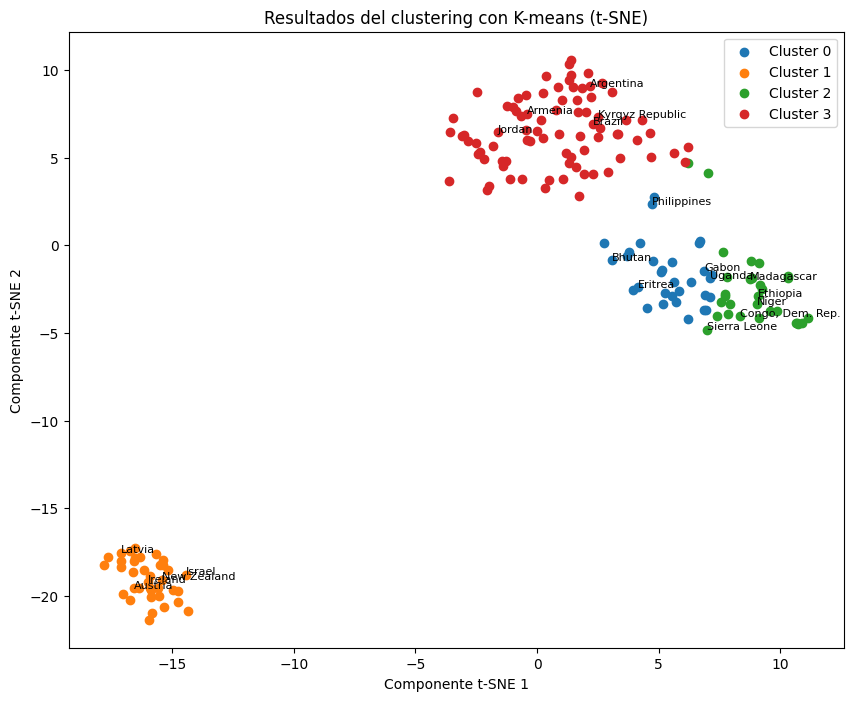

In [152]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_data_2012)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_4, 'Country': countries})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(k):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

Por lo que se ve ahora, los paises desarrollados se siguen manteniendo firmes y separados del resto, mientras que se ha separado el cluster que peor estaba en dos partes que asumo que tiene una relacion con las regiones porque porque los azules son paises orientales en vias de desarrollo, y los verdes paises de medio oriente y de africa.

#  ```5 clusters```

In [153]:
#Inicializamos k
k = 5
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=k, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_data_2012)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_5 = kmeans.predict(features_data_2012)
print(clusters_kmeans_5)

[1 3 0 3 0 2 4 3 0 3 4 0 3 2 1 1 4 2 1 3 4 2 3 1 0 2 3 3 0 3 1 0 1 4 1 4 3
 1 3 3 1 0 3 0 4 1 3 1 2 3 2 4 2 3 3 3 1 1 4 1 2 2 4 3 2 0 1 3 4 1 0 4 0 3
 4 1 3 1 3 1 0 4 3 2 0 3 1 3 3 3 0 4 0 3 1 3 3 3 1 4 2 3 0 1 3 3 2 1 1 1 2
 1 3 4 3 3 0 0 4 0 3 3 4 4 0 0 0 0 3 3 3 2 4 0 1 3 3 0 3 3 3 3 0 4 0 0 3 0
 1 1 0 1 3 0 3 0 3 0 1 3 2 3 0 1 0 1 2 1 0 3 3 3 3 3 4 1 2 3 2]


In [154]:
# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Country': countries, 'Cluster': clusters_kmeans_5})

# Imprimimos los países de cada cluster
for cluster_num in range(k):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Country'].tolist())


Cluster 0:
['Gabon', 'Eritrea', 'Sierra Leone', 'Bhutan', 'Uganda', 'India', 'Burundi', 'Rwanda', 'Comoros', 'Botswana', 'Mozambique', 'Tanzania', 'Zimbabwe', 'Cambodia', 'Zambia', 'Cameroon', 'Liberia', 'Togo', 'Djibouti', 'Kenya', 'Burkina Faso', 'Bangladesh', 'Benin', 'Ghana', 'Nepal', 'Guinea-Bissau', 'Lesotho', "Cote d'Ivoire", 'Malawi', 'Namibia', 'Gambia, The', 'Eswatini', 'Timor-Leste', 'Senegal', 'Mauritania', 'Lao PDR', 'Myanmar']

Cluster 1:
['Israel', 'Latvia', 'New Zealand', 'Austria', 'Ireland', 'Finland', 'United States', 'Czechia', 'Italy', 'Germany', 'Canada', 'Slovenia', 'Greece', 'Sweden', 'Iceland', 'Slovak Republic', 'Estonia', 'Spain', 'Denmark', 'United Kingdom', 'Switzerland', 'Australia', 'Hungary', 'Croatia', 'Bulgaria', 'France', 'Portugal', 'Malta', 'Netherlands', 'Cyprus', 'Lithuania', 'Romania', 'Japan', 'Belgium', 'Poland', 'Norway', 'Luxembourg']

Cluster 2:
['Madagascar', 'Ethiopia', 'Niger', 'Congo, Dem. Rep.', 'Equatorial Guinea', 'Angola', 'South Af

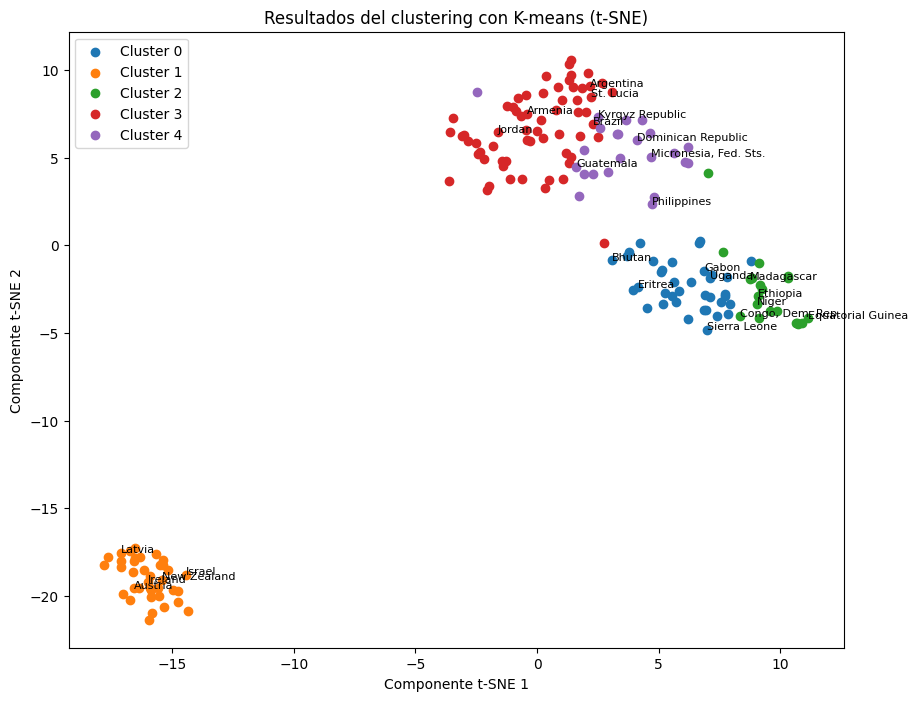

In [155]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_data_2012)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_5, 'Country': countries})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(k):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

Los desarrollados siguen unidos y los no desarrollados se separan aun mas, ahora los que no estaban tan mal se sapararon enntre los que no estan tan mal y los que podrian estar mejor. 

# ```Que clustering fue mejor?```

K-means 3 clusters
DB score: 0.9319
Silhouette score: 0.4327
----------
K-means 4 clusters
DB score: 1.2815
Silhouette score: 0.3864
----------
K-means 5 clusters
DB score: 1.4485
Silhouette score: 0.2925
----------


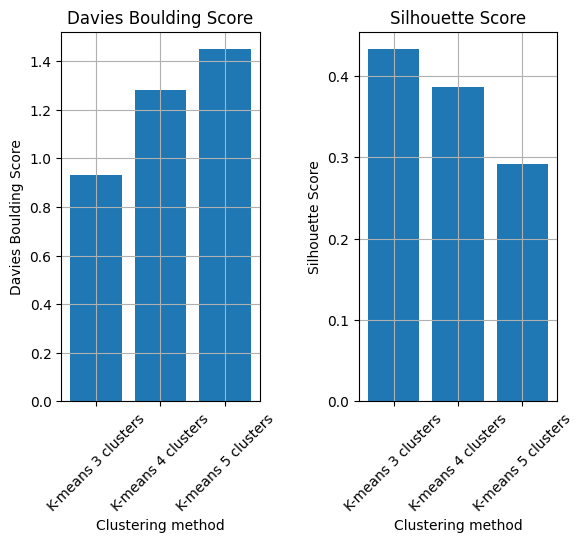

In [156]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# inicializamos listas con los resultados de cada algoritmo y los nombres de los
# algoritmos
clusters_to_compare = [clusters_kmeans_3, clusters_kmeans_4,clusters_kmeans_5]
clustering_methods = ['K-means 3 clusters', 'K-means 4 clusters','K-means 5 clusters']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(features_data_2012, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(features_data_2012, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

# inicializamos un gráfico para cada métrica
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
# graficamos el Davies Bouldin score
axes[0].bar(np.arange(db_scores.size), db_scores)
axes[0].set_title('Davies Boulding Score')
axes[0].set_xlabel('Clustering method')
axes[0].set_ylabel('Davies Boulding Score')
axes[0].set_xticks(np.arange(db_scores.size))
axes[0].set_xticklabels(clustering_methods, rotation=45)
axes[0].grid(True)
# y el Silhouette Score
axes[1].bar(np.arange(silhouette_scores.size), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Clustering method')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(np.arange(silhouette_scores.size))
axes[1].set_xticklabels(clustering_methods, rotation=45)
axes[1].grid(True)

plt.show()

```Davies Boulding```: Cuanto menos valor de mejor.
```Silhouette```: Cuanto mas lejos de -1 mejor.
Tomando esto como analisis el mejor clustering es el del k = 3

# ```CONCLUCIONES```

Por lo analizado anteriormente tiene mucho sentidos las agrupaciones, parece ser que la region global tiene mucha relacion con los agrupamiento porque casi es como si fueran agrupados por este valor. Por ejemplo los mas desarrollados son los de Norte america y europa central, los masomenos somos nosotros en latinoamaerica, sudamerica, y los mas jodidos en medio oriente y africa(sacando sudafrica). Segun la cantidad de clusters el algoritmo va separando mas los paises en desarrollo. Un caso en la zona de micronesia y oriente. Son paises en vias de desarrollo que sanitariamente no estan tan mal como los peores pero tampoco tan bien como los de sudamerica.

# ```ANALISIS CON CLSUTERING AGLOMERATIVO```

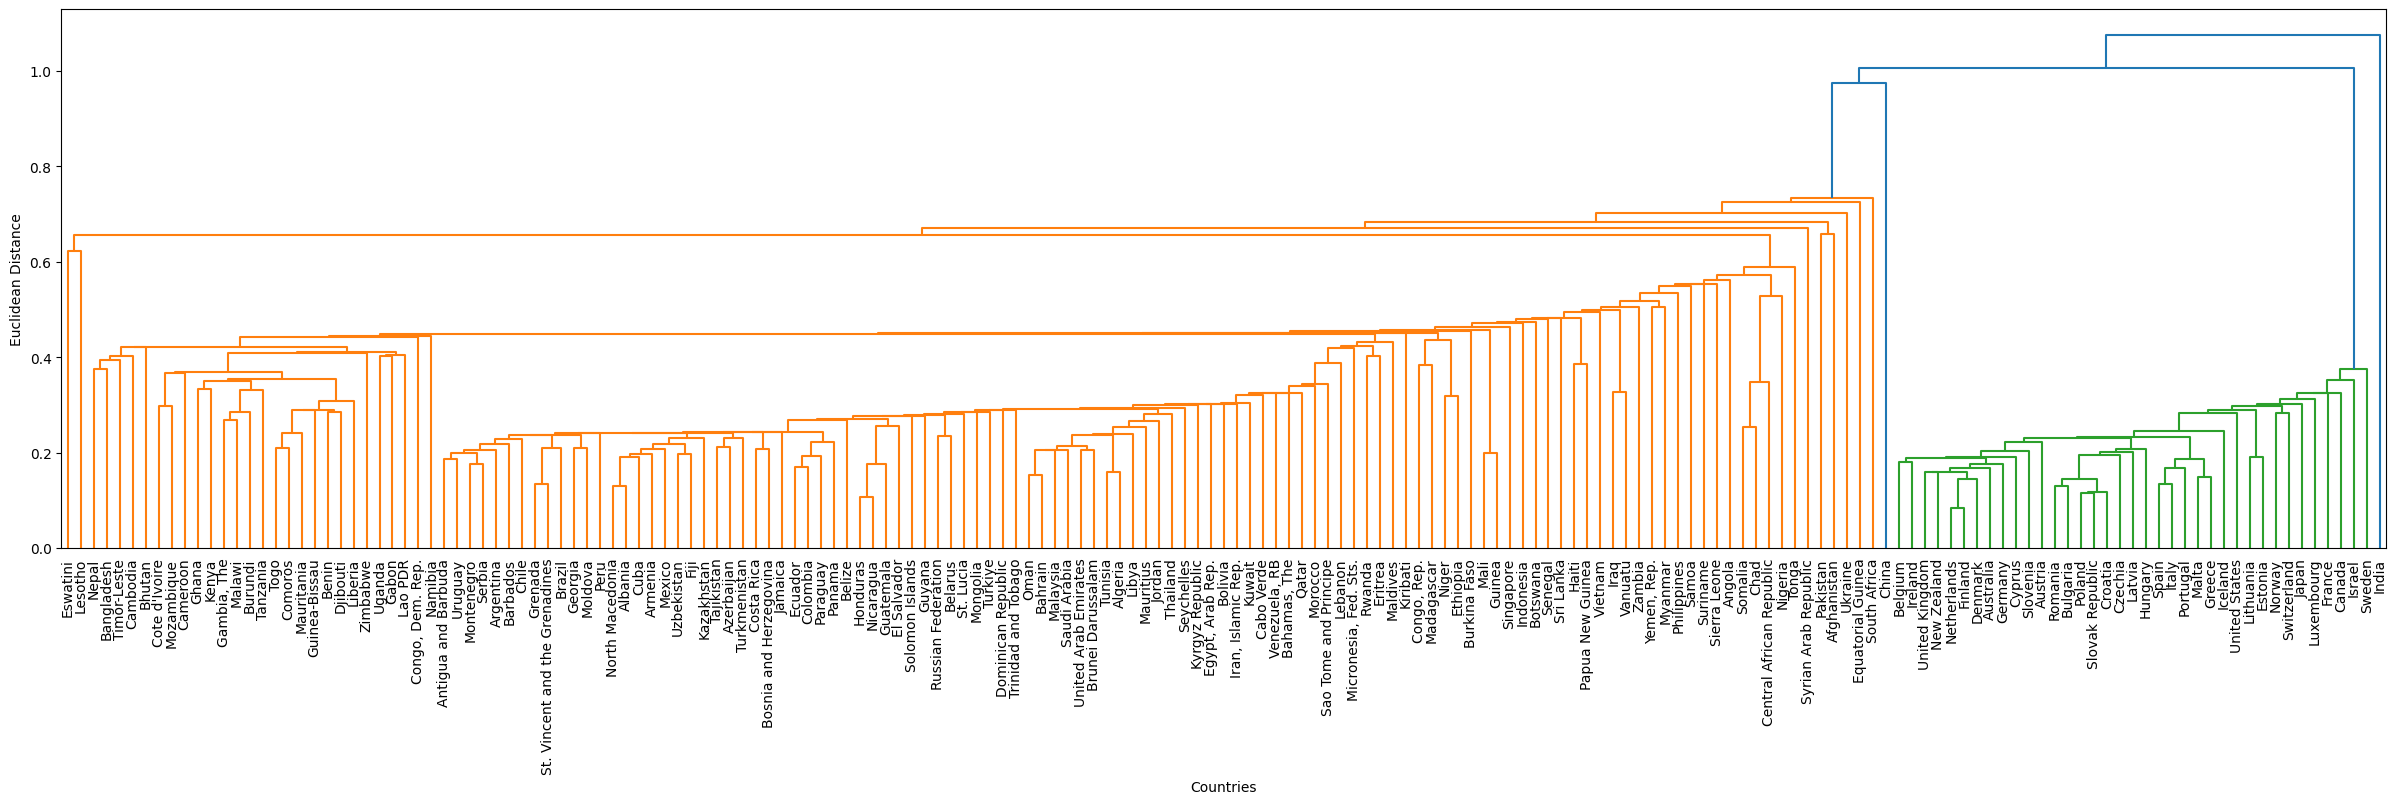

In [157]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generamos el clustering jerárquico
linked = linkage(features_data_2012, method='single')

# ploteamos el dendrograma
plt.figure(figsize=(30,7))
dendrogram(linked,
           orientation='top',
           labels=list(countries), # oko que hay que pasarle una lista
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

SI TOMAMOS COMO PARAMETRO 0.8 QUEDAN LOS SIGUIENTES CLUSTERS:  los rojos, los verdes,CHINA,INDIA

SI TOMAMOS COMO PARAMETRO 1 QUEDAN LOS SIGUIENTES CLUSTERS:  los rojos, los verdes, los azules

## ```UMBRAL 0.8 -> 4 CLUSTERS```

In [158]:
from sklearn.cluster import AgglomerativeClustering

# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='single')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative_08 = agglomerative.fit_predict(features_data_2012)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative_08):
  print('Cluster {}'.format(k))
  print(countries[clusters_agglomerative_08==k])
  print('======')

Cluster 0
10                   Brazil
19                    Gabon
33                   Jordan
34                  Eritrea
39               Madagascar
               ...         
2686    Trinidad and Tobago
2696                Ecuador
2821            Yemen, Rep.
2838                  Chile
2852                Nigeria
Name: Country, Length: 140, dtype: object
Cluster 1
1785    China
Name: Country, dtype: object
Cluster 2
4                Israel
266              Latvia
273         New Zealand
337             Austria
388             Ireland
537             Finland
554       United States
640             Czechia
745               Italy
802             Germany
899              Canada
922            Slovenia
1104             Greece
1115             Sweden
1132            Iceland
1215    Slovak Republic
1235            Estonia
1411              Spain
1446            Denmark
1482     United Kingdom
1544        Switzerland
1641          Australia
1734            Hungary
1767            Croatia
1

Quedo joya lo que predecimos.

## ```UMBRAL 1 -> 3 CLUSTERS```

In [159]:
from sklearn.cluster import AgglomerativeClustering

# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='single')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative_1 = agglomerative.fit_predict(features_data_2012)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative_1):
  print('Cluster {}'.format(k))
  print(countries[clusters_agglomerative_1==k])
  print('======')

Cluster 0
10                   Brazil
19                    Gabon
33                   Jordan
34                  Eritrea
39               Madagascar
               ...         
2686    Trinidad and Tobago
2696                Ecuador
2821            Yemen, Rep.
2838                  Chile
2852                Nigeria
Name: Country, Length: 141, dtype: object
Cluster 1
527    India
Name: Country, dtype: object
Cluster 2
4                Israel
266              Latvia
273         New Zealand
337             Austria
388             Ireland
537             Finland
554       United States
640             Czechia
745               Italy
802             Germany
899              Canada
922            Slovenia
1104             Greece
1115             Sweden
1132            Iceland
1215    Slovak Republic
1235            Estonia
1411              Spain
1446            Denmark
1482     United Kingdom
1544        Switzerland
1641          Australia
1734            Hungary
1767            Croatia
18

## ```COMPARACION```

UMBRAL 1
DB score: 0.6699
Silhouette score: 0.3726
----------
UMBRAL 0,8
DB score: 0.6527
Silhouette score: 0.3311
----------


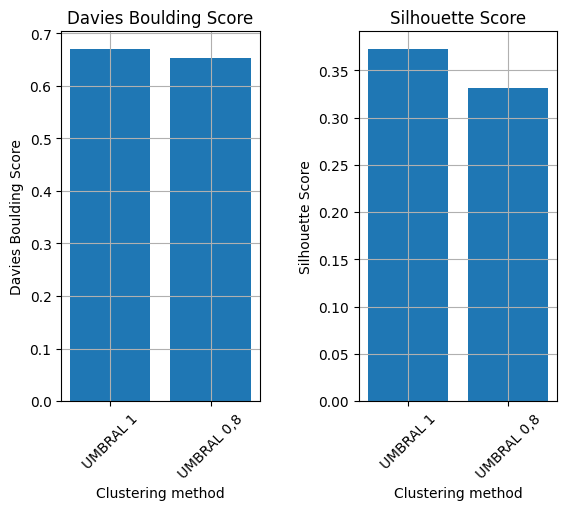

In [160]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# inicializamos listas con los resultados de cada algoritmo y los nombres de los
# algoritmos
clusters_to_compare = [clusters_agglomerative_1, clusters_agglomerative_08]
clustering_methods = ['UMBRAL 1', 'UMBRAL 0,8']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(features_data_2012, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(features_data_2012, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

# inicializamos un gráfico para cada métrica
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
# graficamos el Davies Bouldin score
axes[0].bar(np.arange(db_scores.size), db_scores)
axes[0].set_title('Davies Boulding Score')
axes[0].set_xlabel('Clustering method')
axes[0].set_ylabel('Davies Boulding Score')
axes[0].set_xticks(np.arange(db_scores.size))
axes[0].set_xticklabels(clustering_methods, rotation=45)
axes[0].grid(True)
# y el Silhouette Score
axes[1].bar(np.arange(silhouette_scores.size), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Clustering method')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(np.arange(silhouette_scores.size))
axes[1].set_xticklabels(clustering_methods, rotation=45)
axes[1].grid(True)

Bastante similares los resultados, segun Davis es mjor el umbral de 0,8, por silhouette es mejor el umbral de 1

## ```QUE PASA SI VARIAMOS LA DISTANCIA UTILIZADA EN EL CASO DE 0,8```

In [161]:
# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='complete')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative_08 = agglomerative.fit_predict(features_data_2012)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative_08):
  print('Cluster {}'.format(k))
  print(countries[clusters_agglomerative_08==k])
  print('======')

Cluster 0
206                  Philippines
410            Equatorial Guinea
942                 South Africa
969                        Samoa
1745                        Chad
1794    Central African Republic
1816                     Somalia
1824                    Suriname
1855                     Vanuatu
2069        Syrian Arab Republic
2084                        Iraq
2244                     Ukraine
2852                     Nigeria
Name: Country, dtype: object
Cluster 1
4                    Israel
10                   Brazil
33                   Jordan
48          Kyrgyz Republic
81                  Armenia
               ...         
2681                Morocco
2686    Trinidad and Tobago
2696                Ecuador
2760             Luxembourg
2838                  Chile
Name: Country, Length: 115, dtype: object
Cluster 2
221         Bhutan
527          India
1925    Bangladesh
2087         Nepal
2195       Vietnam
Name: Country, dtype: object
Cluster 3
19                 Gabon
34 

In [162]:
# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='average')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative_08 = agglomerative.fit_predict(features_data_2012)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative_08):
  print('Cluster {}'.format(k))
  print(countries[clusters_agglomerative_08==k])
  print('======')

Cluster 0
10                   Brazil
19                    Gabon
33                   Jordan
34                  Eritrea
39               Madagascar
               ...         
2681                Morocco
2686    Trinidad and Tobago
2696                Ecuador
2821            Yemen, Rep.
2838                  Chile
Name: Country, Length: 136, dtype: object
Cluster 1
410            Equatorial Guinea
1745                        Chad
1794    Central African Republic
1816                     Somalia
2852                     Nigeria
Name: Country, dtype: object
Cluster 2
527    India
Name: Country, dtype: object
Cluster 3
4                Israel
266              Latvia
273         New Zealand
337             Austria
388             Ireland
537             Finland
554       United States
640             Czechia
745               Italy
802             Germany
899              Canada
922            Slovenia
1104             Greece
1115             Sweden
1132            Iceland
1215    Slovak

SEGUN QUE MEDIDA DE DISTANCIA UTILICEMOS CAMBIAN LOS GRUPOS! CON COMPLETE INDIA YA NO ESTA EN UN GRUPO SOLA PERO CON AVERAGE VUELVE A ESTAR SOLA

## ```ANALISIS DE CARACTERISTICAS```

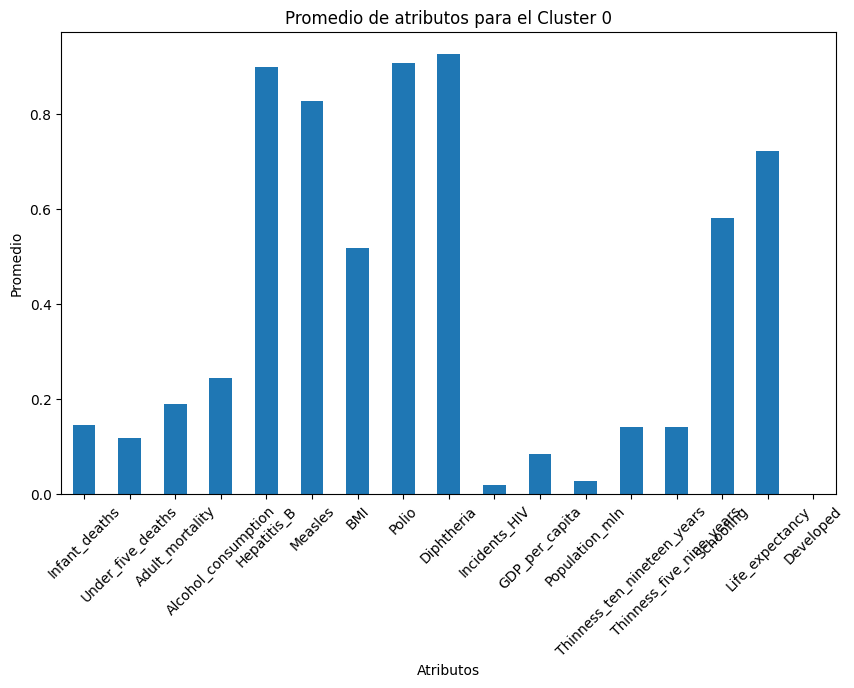

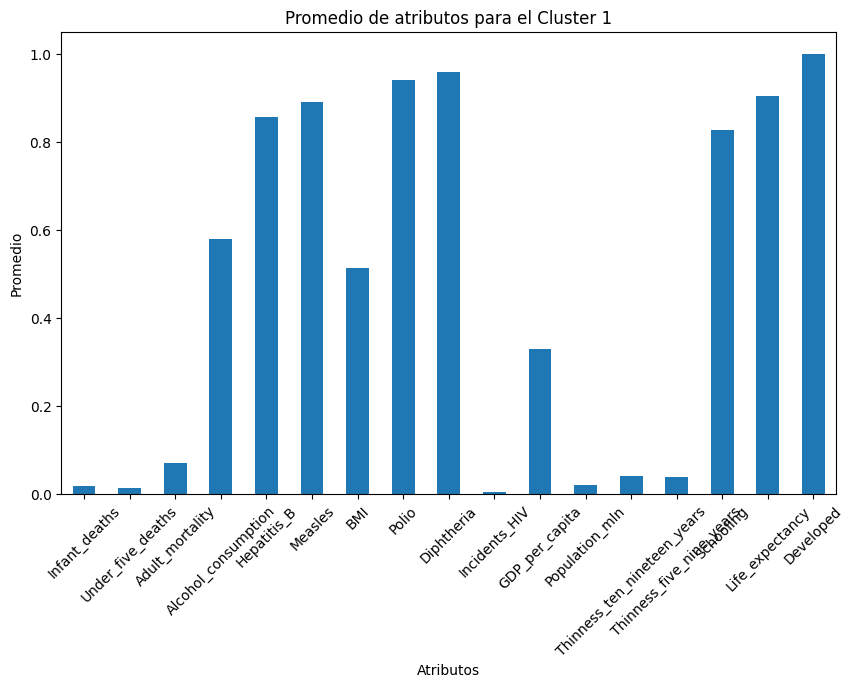

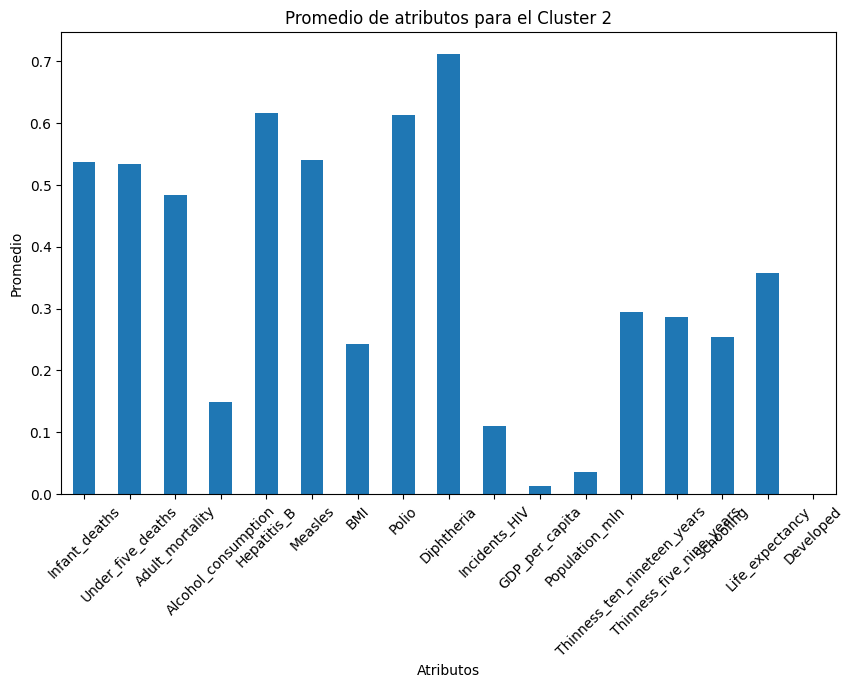

In [169]:
# Añadir los resultados de los clusters al DataFrame
features_data_2012 = features_data_2012.copy()  # Crear copia si es necesario
features_data_2012['Cluster'] = clusters_kmeans_3  # Crear columna de clúster

# Calcular los promedios por clúster
cluster_means = features_data_2012.groupby('Cluster').mean()

# Graficar cada clúster con sus promedios de atributos
for cluster_id in cluster_means.index:
    plt.figure(figsize=(10, 6))
    cluster_means.loc[cluster_id].plot(kind='bar')
    plt.title(f'Promedio de atributos para el Cluster {cluster_id}')
    plt.xlabel('Atributos')
    plt.ylabel('Promedio')
    plt.xticks(rotation=45)
    plt.show()

In [170]:
# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Country': countries, 'Cluster': clusters_kmeans_3})

# Imprimimos los países de cada cluster
for cluster_num in range(3):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Country'].tolist())


Cluster 0:
['Brazil', 'Jordan', 'Kyrgyz Republic', 'Armenia', 'St. Lucia', 'Philippines', 'Bhutan', 'Azerbaijan', 'Guatemala', 'Belarus', 'Micronesia, Fed. Sts.', 'St. Vincent and the Grenadines', 'Turkmenistan', 'Turkiye', 'Bahrain', 'Dominican Republic', 'Indonesia', 'Bosnia and Herzegovina', 'Serbia', 'Argentina', 'Rwanda', 'Algeria', 'Sao Tome and Principe', 'Costa Rica', 'Cuba', 'Samoa', 'Nicaragua', 'Oman', 'Mongolia', 'Venezuela, RB', 'Solomon Islands', 'Seychelles', 'Botswana', 'Qatar', 'Panama', 'Bolivia', 'Grenada', 'Egypt, Arab Rep.', 'Cabo Verde', 'Mauritius', 'Tonga', 'Bahamas, The', 'Fiji', 'Colombia', 'Kuwait', 'Honduras', 'Kiribati', 'Kazakhstan', 'Uruguay', 'Thailand', 'Moldova', 'Lebanon', 'Brunei Darussalam', 'Saudi Arabia', 'China', 'Libya', 'Suriname', 'Mexico', 'Maldives', 'Vanuatu', 'Sri Lanka', 'Tajikistan', 'Peru', 'Paraguay', 'Guyana', 'Russian Federation', 'United Arab Emirates', 'Antigua and Barbuda', 'Georgia', 'Vietnam', 'El Salvador', 'Iran, Islamic Rep.

```CLUSTER 0``` -> En desarrollo

```CLUSTER 1``` ->Desarrollados

```CLUSTER 2```->En desarrollo pero mal(medio oriente, africa)

En comparacion los paises desarrollados los no desarrollados y en peor estado los de peor tienen valores mas altos en las caracteristicas negativas como mortalidad infantil, en los tres grupos igualmente los casos de VIH son bajos. La esperanza de vida en el cluster 0 y 1 son similares pero en el 2 es muy baja

# ```LO MISMO PERO CON EL DATASET DE OBESIDAD```

In [171]:
#from sklearn.cluster import KMeans
import wget
import pandas as pd

from os import path

# inicializamos un diccionario donde guardaremos el dataset
dataset = dict()
dataset['url'] = 'https://ignaciorlando.github.io/datasets/data-science/ObesityDataSet_raw_and_data_sinthetic.csv'
dataset['extension'] = '.csv'
dataset['filename'] = 'Obesity' + dataset['extension']
if not path.exists(dataset['filename']):  # descargar solamente si no existe
  wget.download(dataset['url'], dataset['filename'])
else:
  print('El archivo {} ya existe.'.format(dataset['filename']))

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')
original_table.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [197]:
#Hagamos una copia
copy_dataset_obesity =  original_table.copy()

In [198]:
#Arreglemos las columnas
copy_dataset_obesity['FAVC'] = copy_dataset_obesity['FAVC'].apply(lambda x: 1 if x == 'yes' else 0)
copy_dataset_obesity = pd.get_dummies(copy_dataset_obesity, columns=['CAEC'],dtype='int')
copy_dataset_obesity = pd.get_dummies(copy_dataset_obesity, columns=['CALC'],dtype='int')

In [199]:
#Tiramos lo que no sirve
copy_dataset_obesity = copy_dataset_obesity.drop('Age', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('Gender', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('Height', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('SCC', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('SMOKE', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('family_history_with_overweight', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('FAF', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('TUE', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('MTRANS', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('NObeyesdad', axis=1)
copy_dataset_obesity = copy_dataset_obesity.drop('Weight', axis=1)

In [200]:
copy_dataset_obesity 

,FAVC,FCVC,NCP,CH2O,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,2.0,3.0,2.000000,0,0,1,0,0,0,0,1
1,0,3.0,3.0,3.000000,0,0,1,0,0,0,1,0
2,0,2.0,3.0,2.000000,0,0,1,0,0,1,0,0
3,0,3.0,3.0,2.000000,0,0,1,0,0,1,0,0
4,0,2.0,1.0,2.000000,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,3.0,3.0,1.728139,0,0,1,0,0,0,1,0
2107,1,3.0,3.0,2.005130,0,0,1,0,0,0,1,0
2108,1,3.0,3.0,2.054193,0,0,1,0,0,0,1,0
2109,1,3.0,3.0,2.852339,0,0,1,0,0,0,1,0


In [201]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = copy_dataset_obesity.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
copy_dataset_obesity[numeric_cols] = scaler.fit_transform(copy_dataset_obesity[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
copy_dataset_obesity.head()

,FAVC,FCVC,NCP,CH2O,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.0,0.5,0.666667,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.5,0.666667,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.666667,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.5,0.000000,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## ```HAGAMOS EL CLUSTERING JERARQUICO```

### ```POR JACCARD```

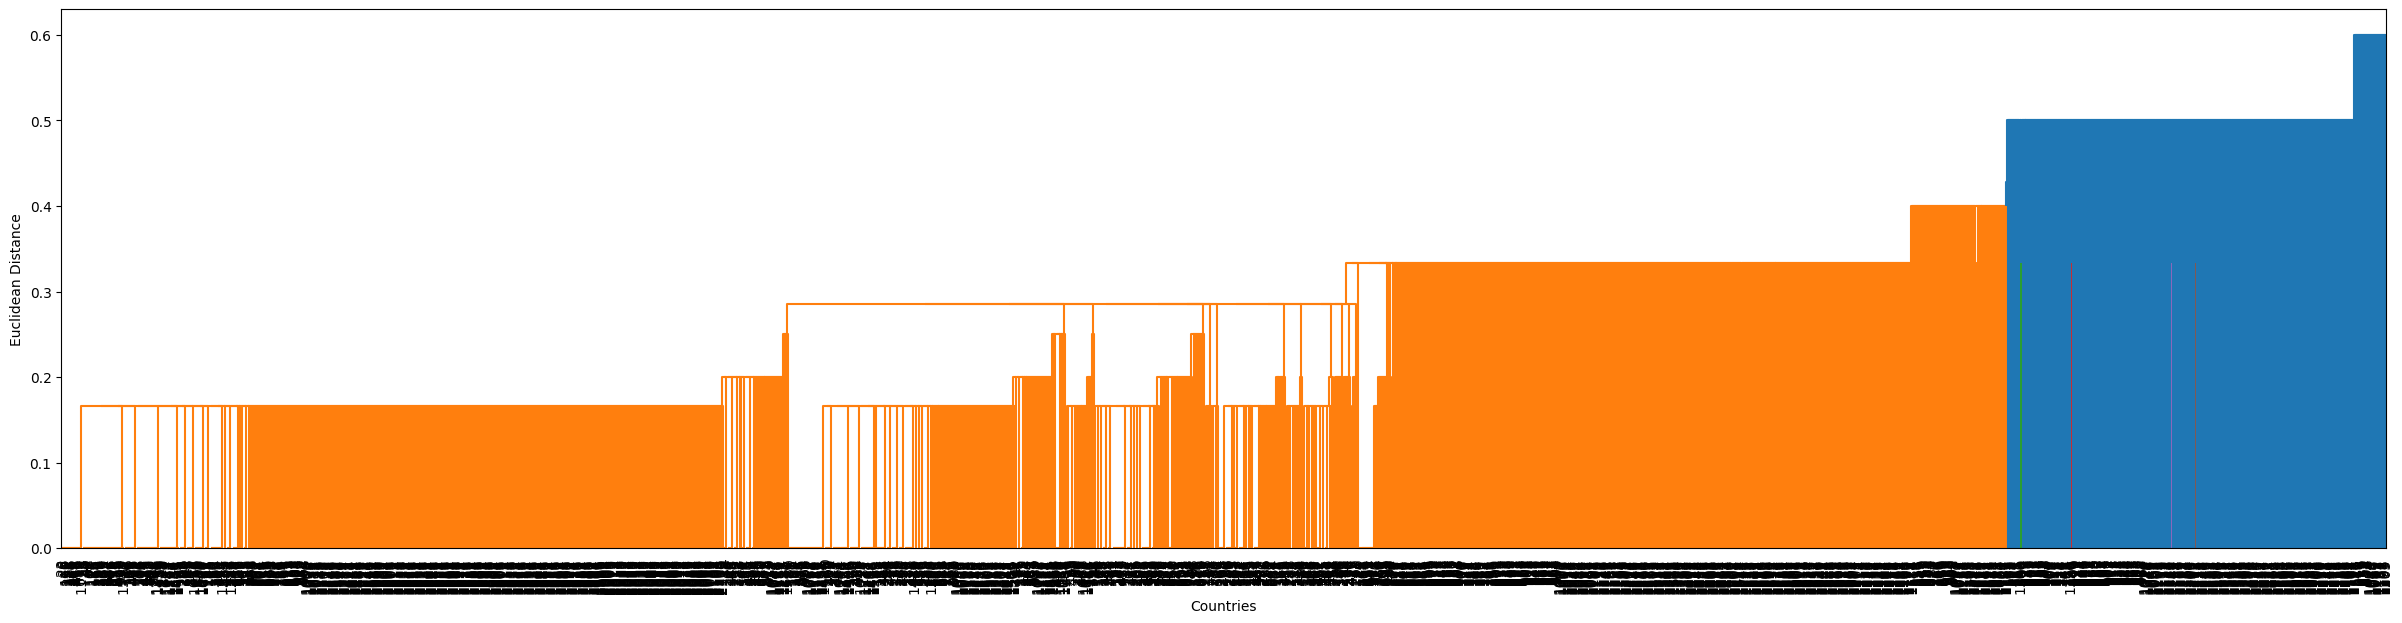

In [204]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generamos el clustering jerárquico
linked = linkage(copy_dataset_obesity, method='single',metric='Jaccard')

# ploteamos el dendrograma
plt.figure(figsize=(30,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.xlabel('people')
plt.ylabel('Euclidean Distance')
plt.show()

### ```POR HAMMING```

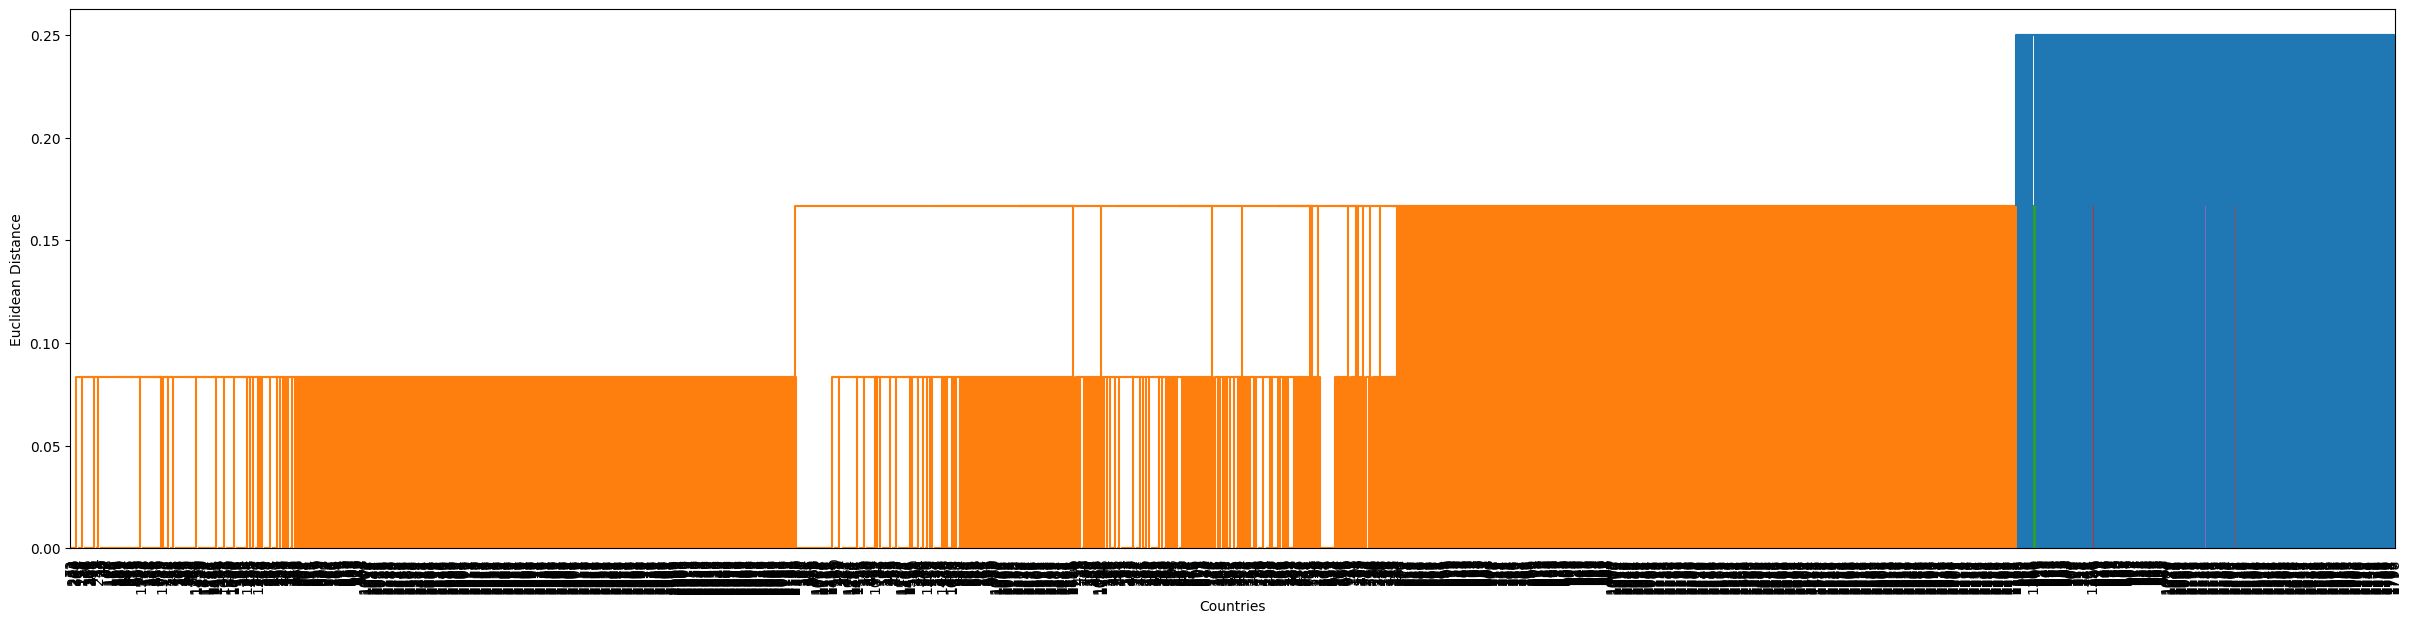

In [205]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generamos el clustering jerárquico
linked = linkage(copy_dataset_obesity, method='single',metric='Hamming')

# ploteamos el dendrograma
plt.figure(figsize=(30,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.xlabel('people')
plt.ylabel('Euclidean Distance')
plt.show()

Parecidos pero no iguales, si tomamos como umbral 0,20 nos quedan dos grupos. 

### ```POR EUCLIDEA```

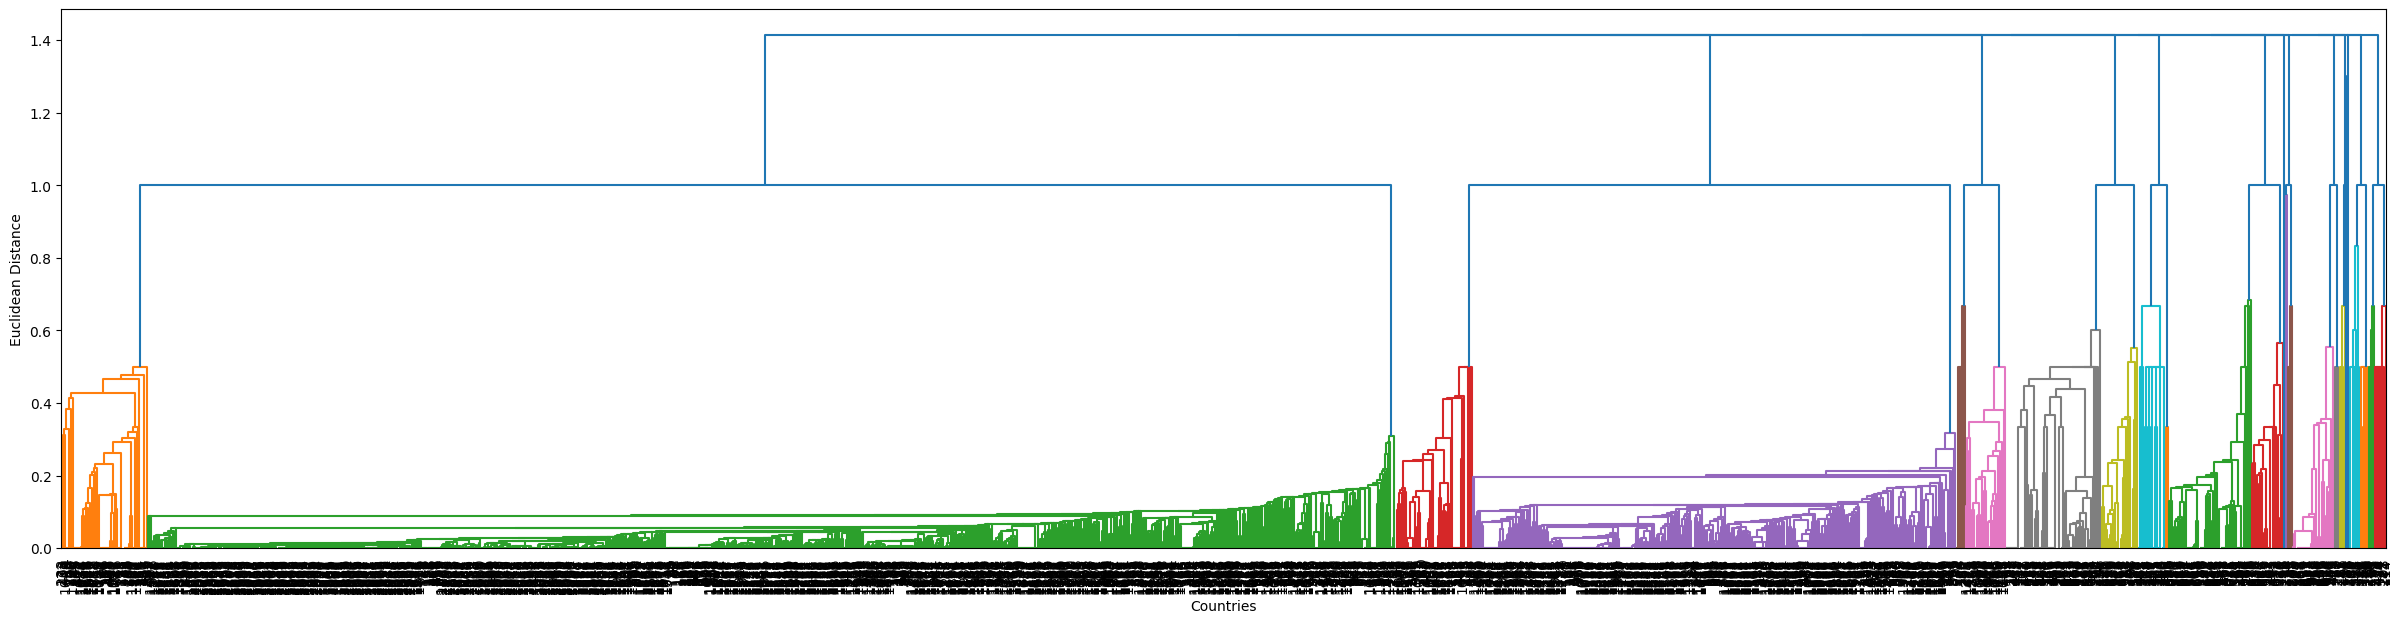

In [215]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generamos el clustering jerárquico
linked = linkage(copy_dataset_obesity, method='single')

# ploteamos el dendrograma
plt.figure(figsize=(30,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

## ```VISUALIZACION DE CLSUTERS CON T-SNE```

In [245]:
from sklearn.cluster import AgglomerativeClustering

# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=21, linkage='single')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative = agglomerative.fit_predict(copy_dataset_obesity)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative):
  print('Cluster {}'.format(k))
  print('======')

Cluster 0
Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9
Cluster 10
Cluster 11
Cluster 12
Cluster 13
Cluster 14
Cluster 15
Cluster 16
Cluster 17
Cluster 18
Cluster 19
Cluster 20


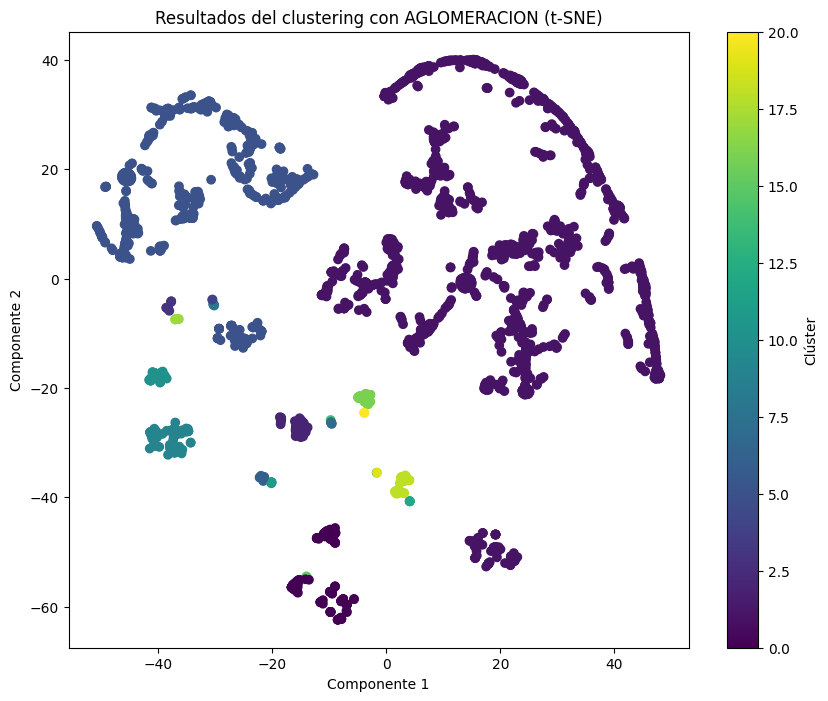

In [246]:
# Graficar los resultados de t-SNE, coloreando por clúster
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_agglomerative)
plt.colorbar(label='Clúster')
plt.title('Visualización de t-SNE con Clústeres Aglomerativos')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Resultados del clustering con AGLOMERACION (t-SNE)')
plt.show()
plt.show()


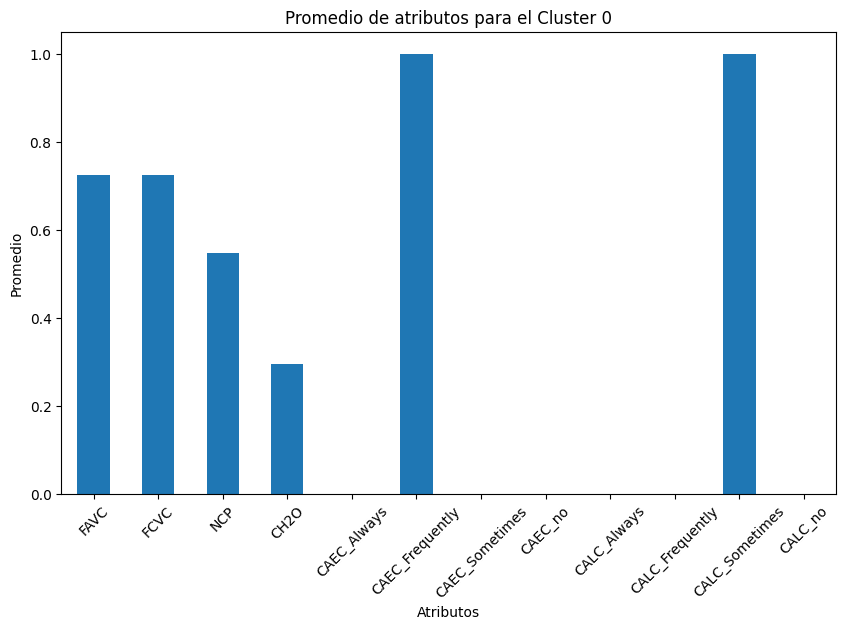

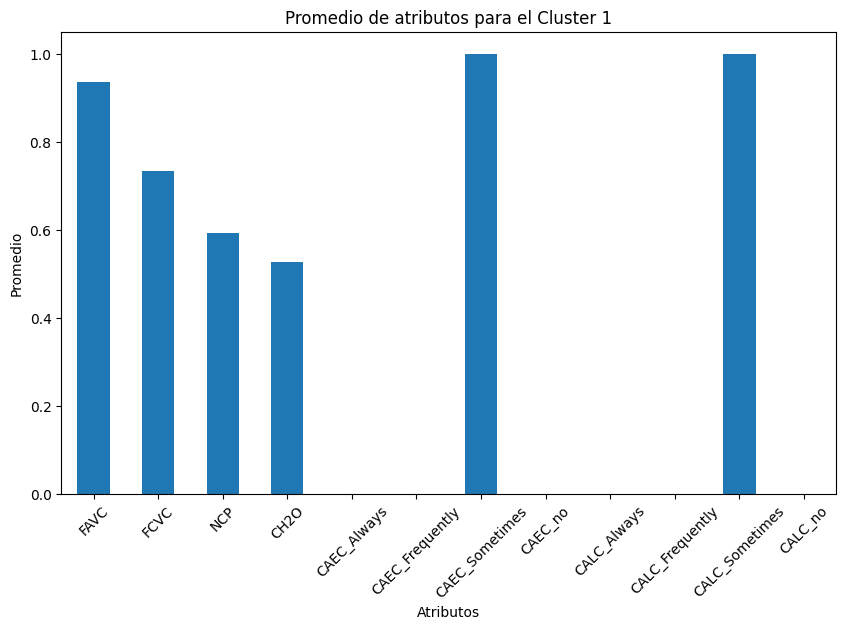

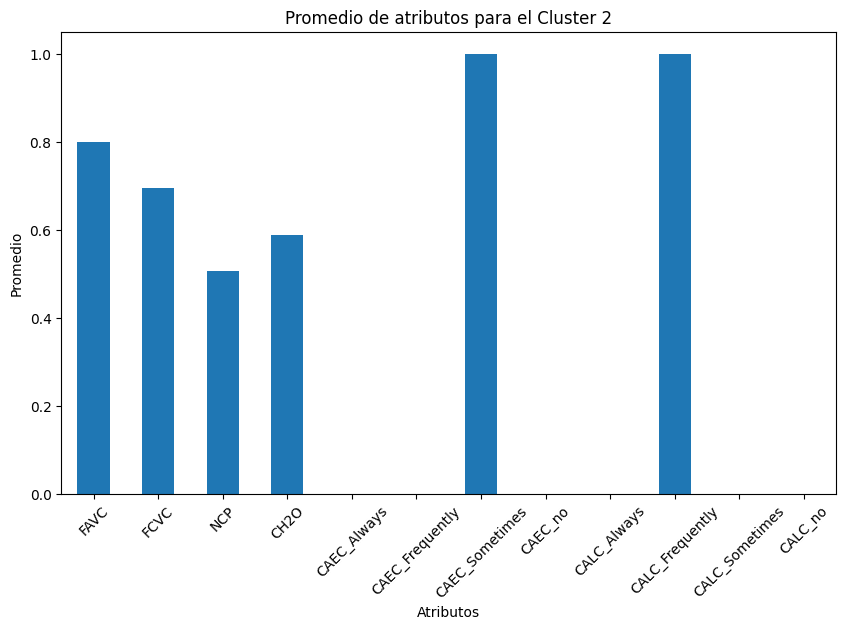

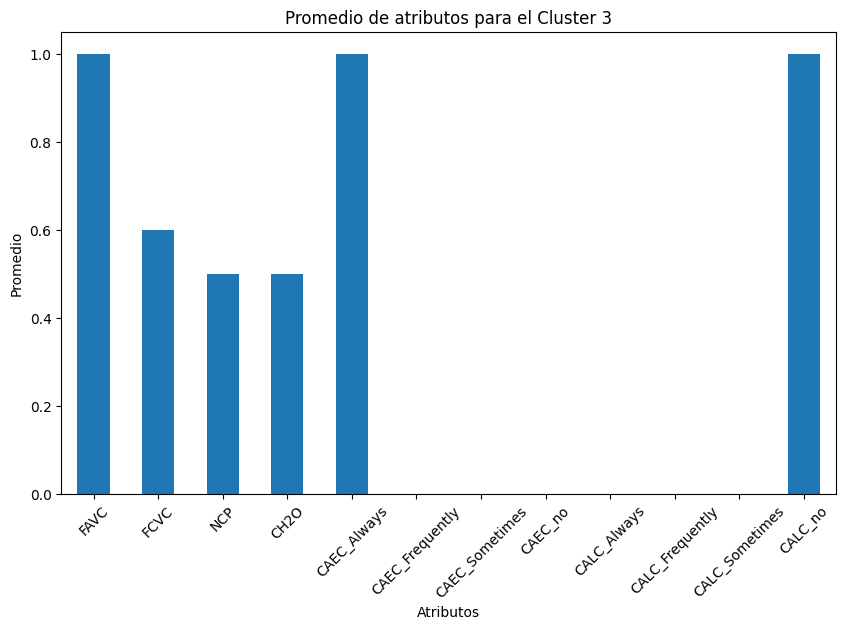

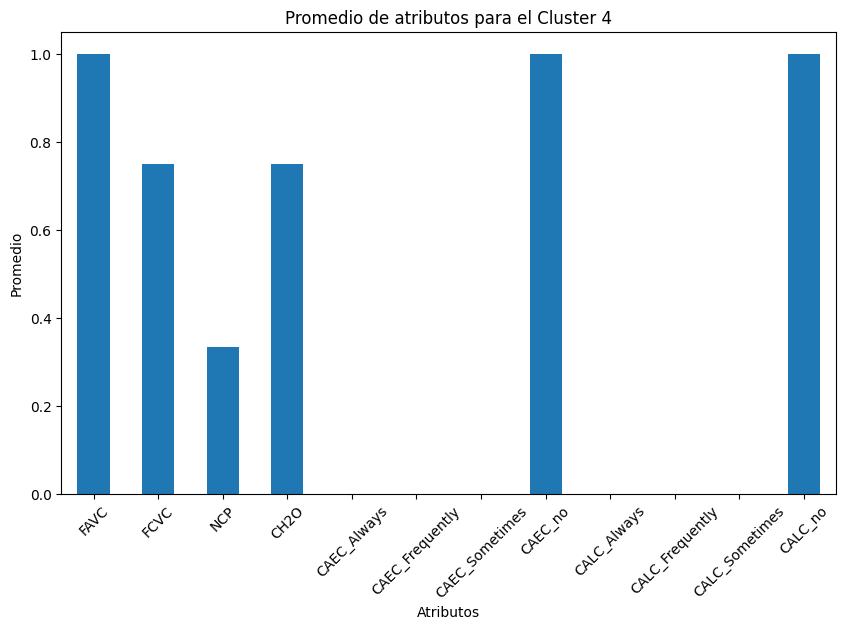

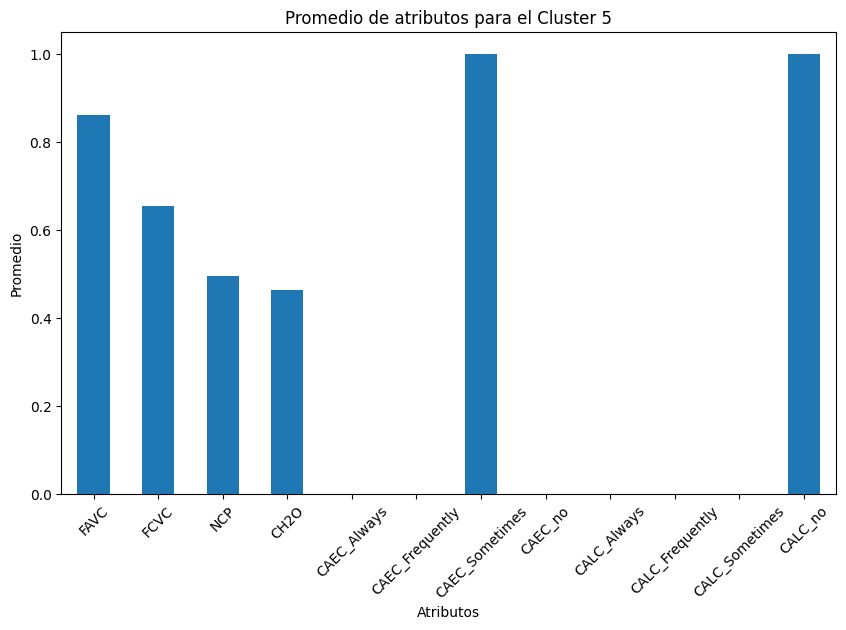

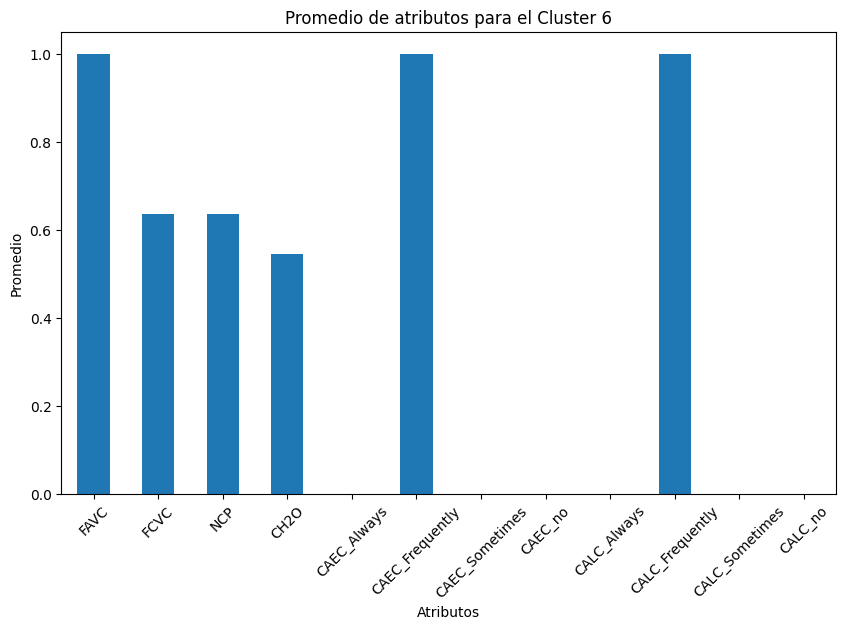

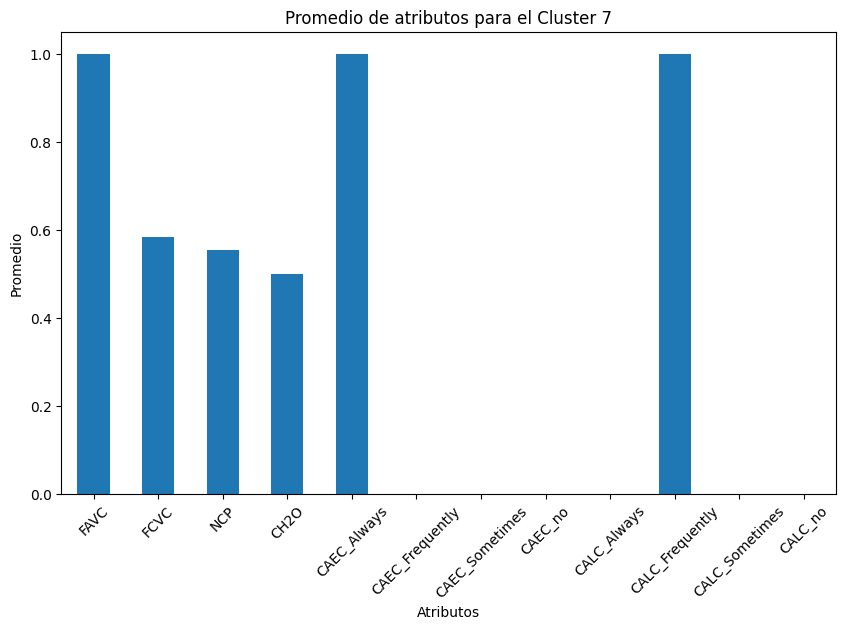

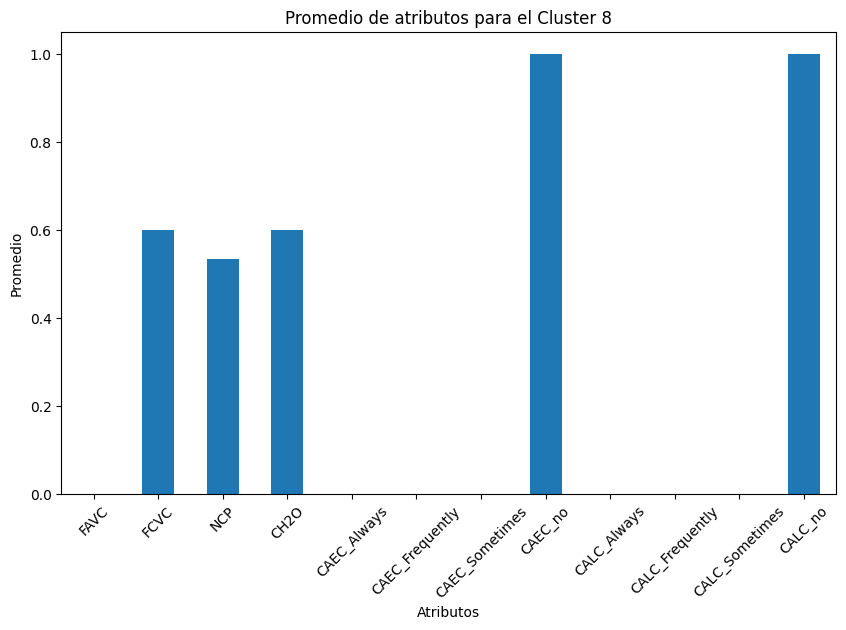

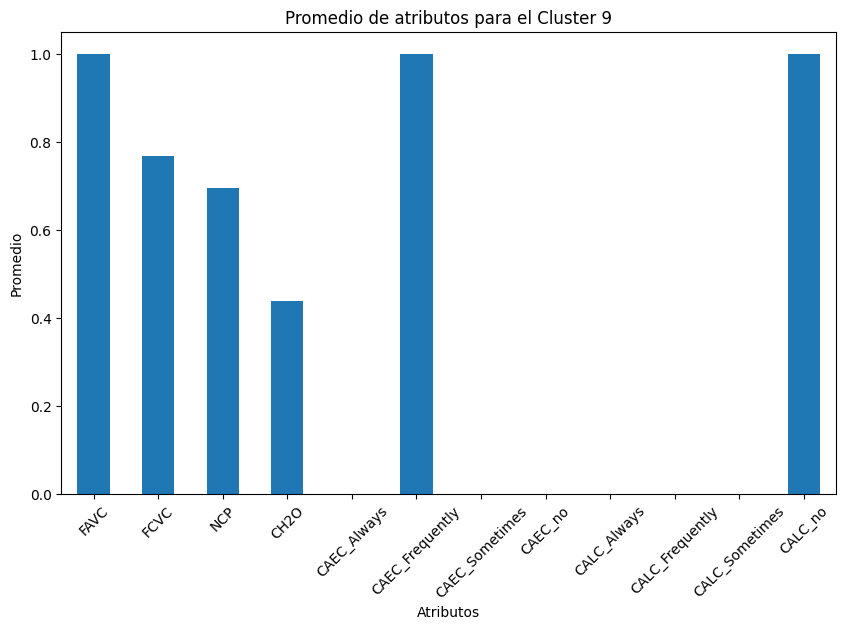

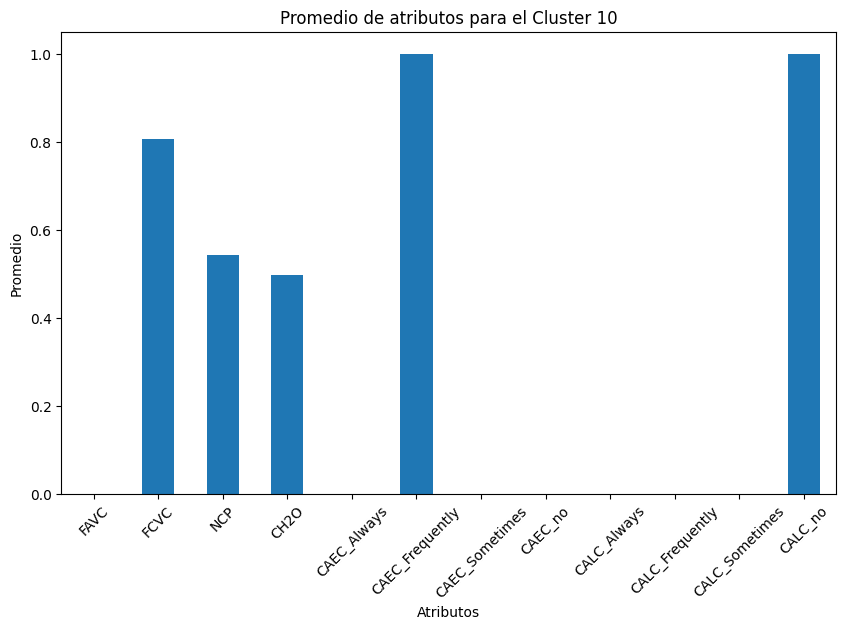

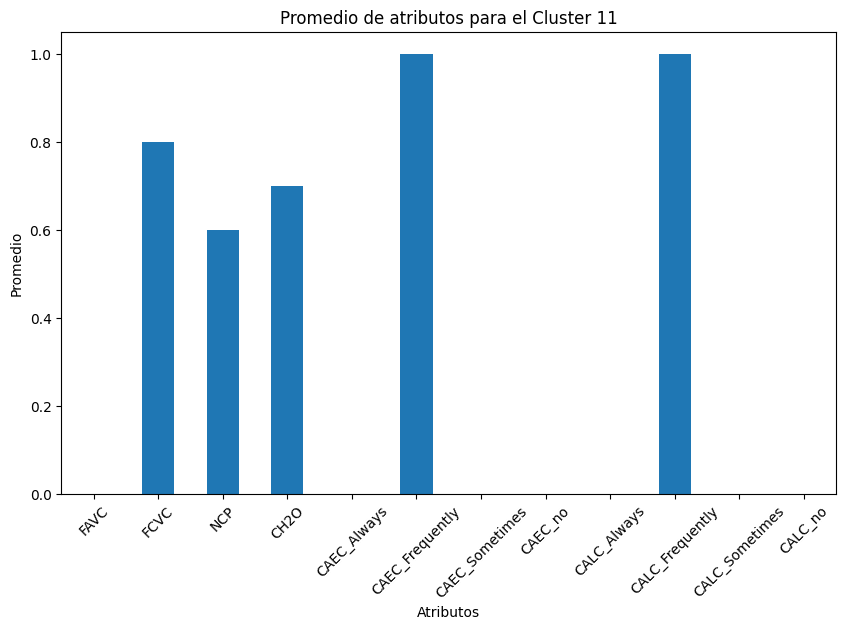

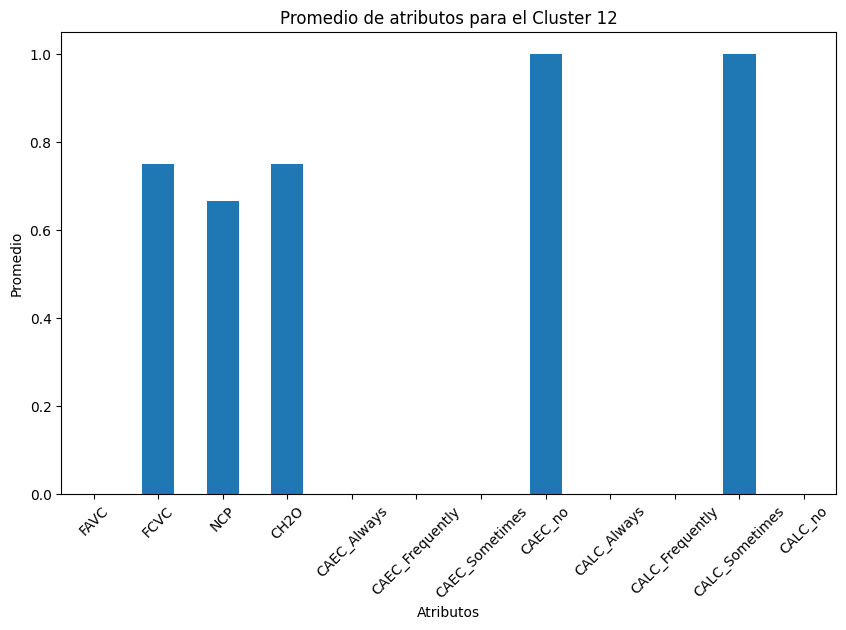

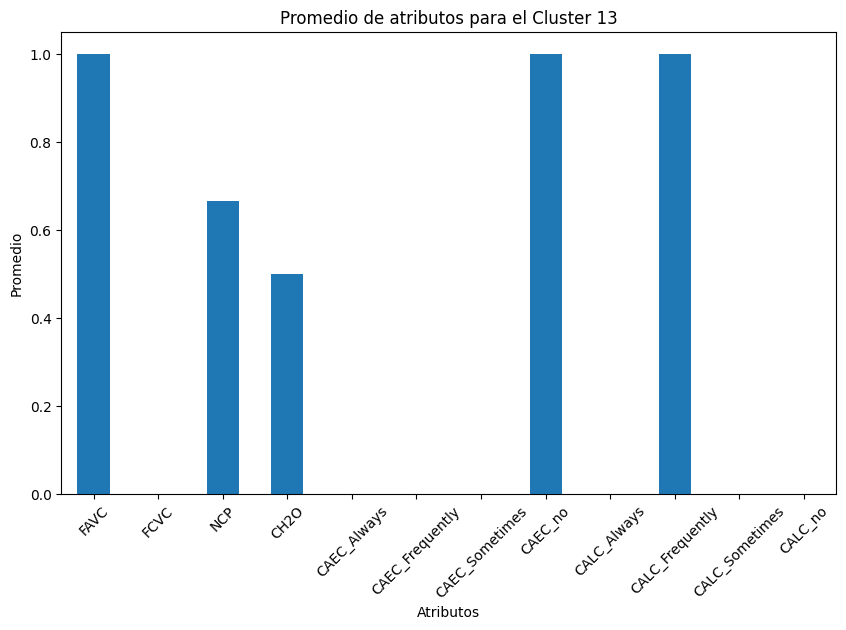

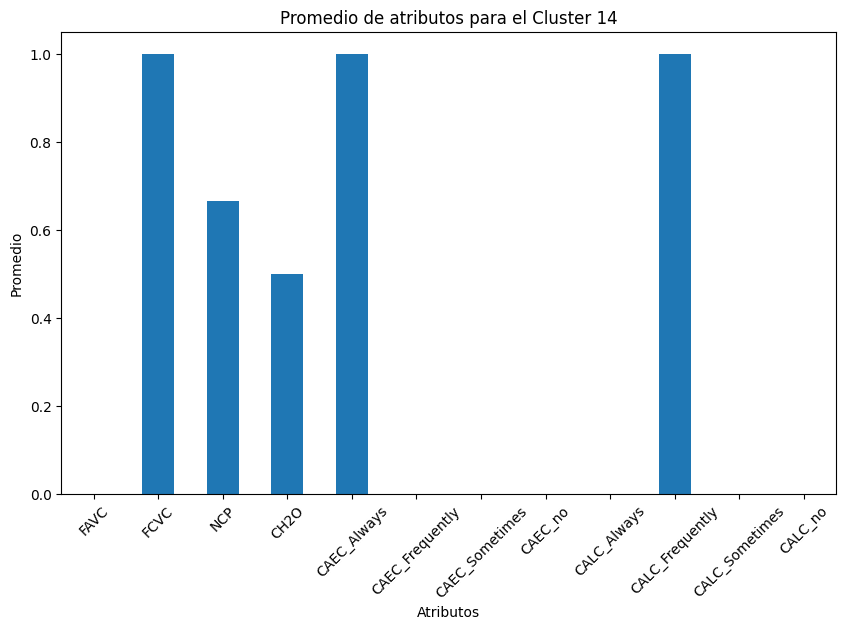

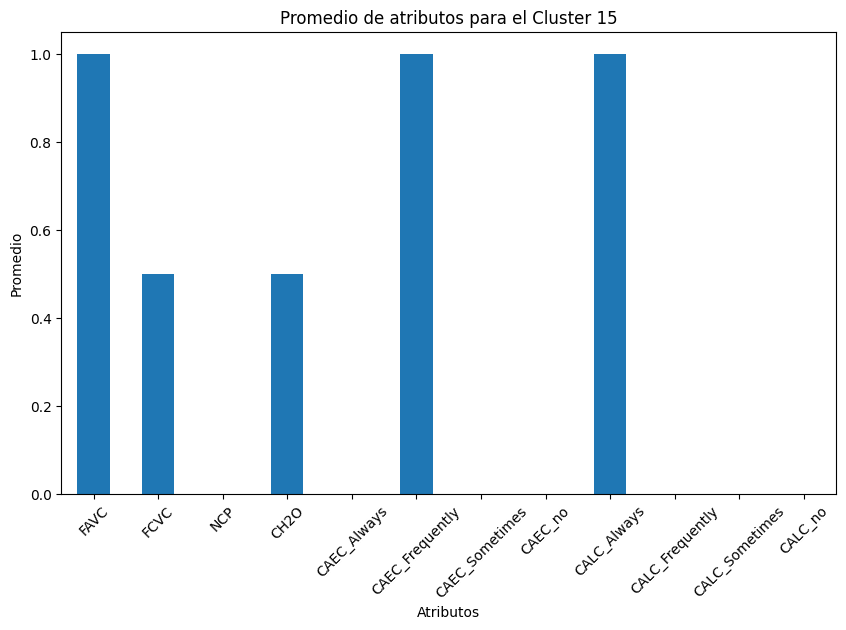

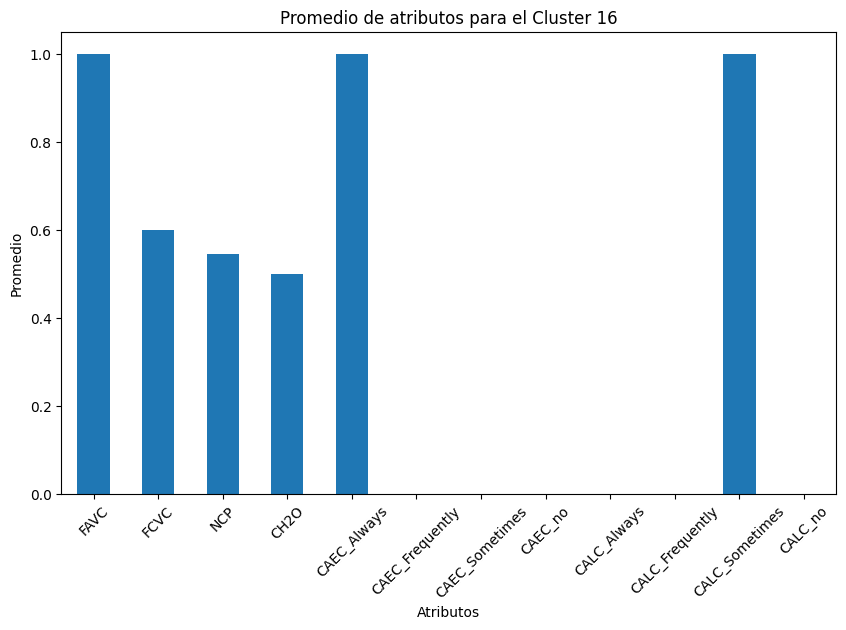

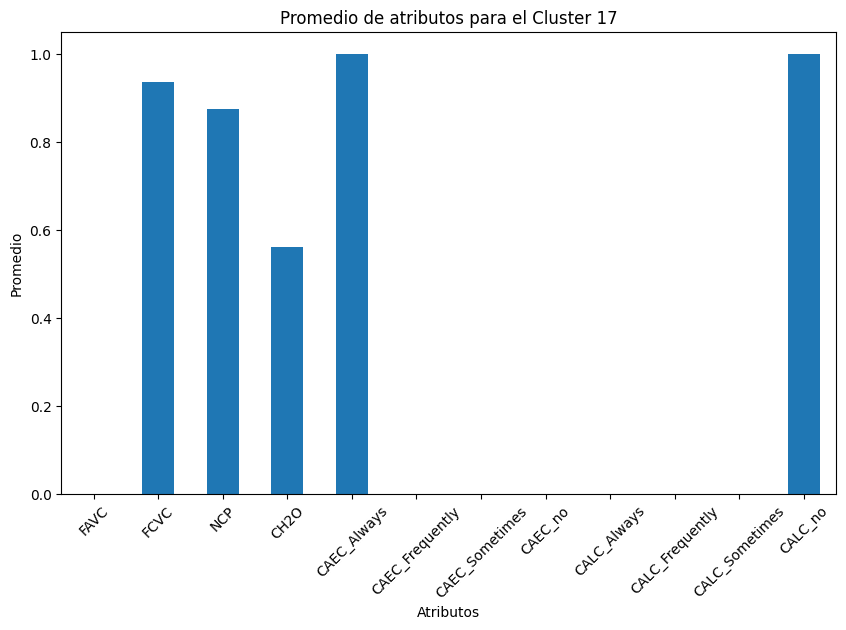

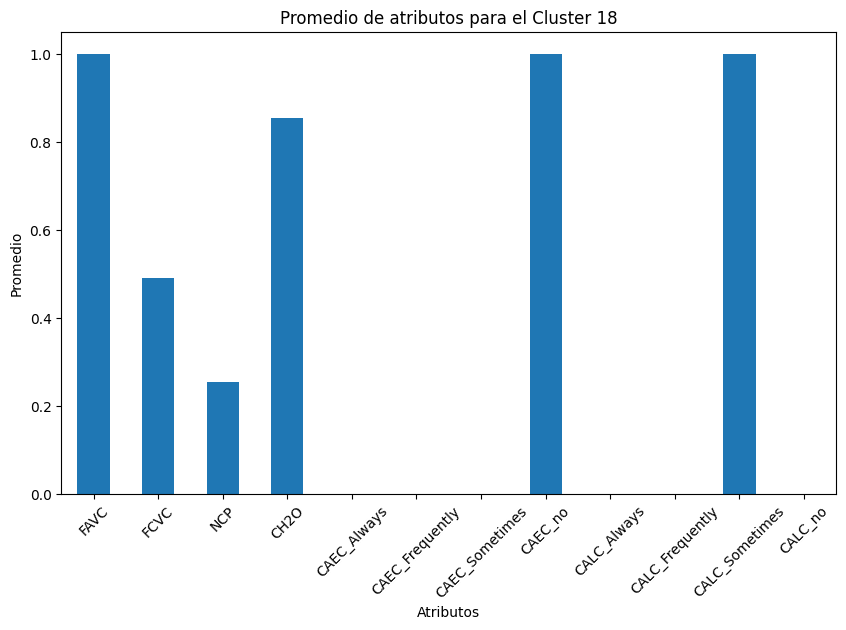

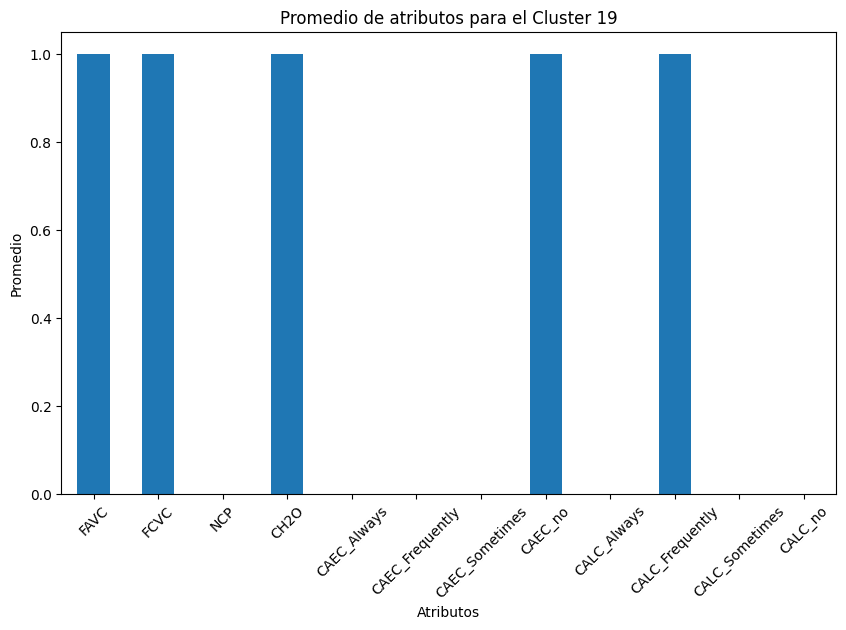

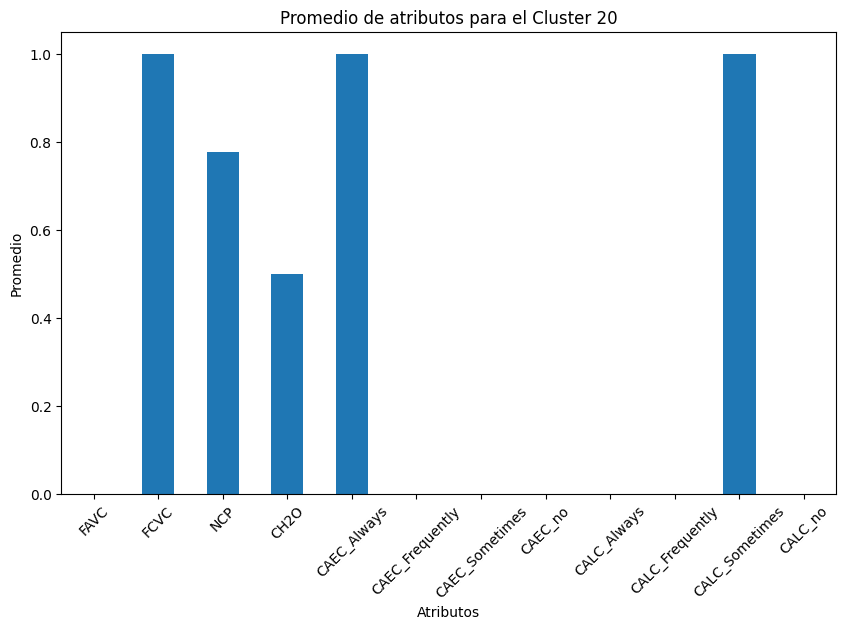

In [247]:
copy_dataset_obesity['Cluster'] = clusters_agglomerative

# Calcular los promedios de cada atributo por clúster
cluster_means = copy_dataset_obesity.groupby('Cluster').mean()

# Graficar los promedios de atributos para cada clúster
for cluster_id in cluster_means.index:
    plt.figure(figsize=(10, 6))
    cluster_means.loc[cluster_id].plot(kind='bar')
    plt.title(f'Promedio de atributos para el Cluster {cluster_id}')
    plt.xlabel('Atributos')
    plt.ylabel('Promedio')
    plt.xticks(rotation=45)
    plt.show()

 ve que los grupos mas numerosos son los que menos consumo de comida saludable tienen, rosa y medio azul.

## ```CLUSTERING MEDIANTE ACTIVIDAD FISICA```

(FAF, SCC, TUE, MTRANS).

In [251]:
#Hagamos una copia
copy_dataset_obesity = original_table.copy()
copy_dataset_obesity_fisica = pd.concat([copy_dataset_obesity['FAF'],copy_dataset_obesity['SCC'],copy_dataset_obesity['TUE'],copy_dataset_obesity['MTRANS']],axis=1)
copy_dataset_obesity_fisica

,FAF,SCC,TUE,MTRANS
0,0.000000,no,1.000000,Public_Transportation
1,3.000000,yes,0.000000,Public_Transportation
2,2.000000,no,1.000000,Public_Transportation
3,2.000000,no,0.000000,Walking
4,0.000000,no,0.000000,Public_Transportation
...,...,...,...,...
2106,1.676269,no,0.906247,Public_Transportation
2107,1.341390,no,0.599270,Public_Transportation
2108,1.414209,no,0.646288,Public_Transportation
2109,1.139107,no,0.586035,Public_Transportation


In [252]:
copy_dataset_obesity_fisica['SCC'] = copy_dataset_obesity_fisica['SCC'].apply(lambda x: 1 if x == 'yes' else 0)
copy_dataset_obesity_fisica = pd.get_dummies(copy_dataset_obesity_fisica, columns=['MTRANS'],dtype='int')
copy_dataset_obesity_fisica

,FAF,SCC,TUE,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.000000,0,1.000000,0,0,0,1,0
1,3.000000,1,0.000000,0,0,0,1,0
2,2.000000,0,1.000000,0,0,0,1,0
3,2.000000,0,0.000000,0,0,0,0,1
4,0.000000,0,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2106,1.676269,0,0.906247,0,0,0,1,0
2107,1.341390,0,0.599270,0,0,0,1,0
2108,1.414209,0,0.646288,0,0,0,1,0
2109,1.139107,0,0.586035,0,0,0,1,0


In [253]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = copy_dataset_obesity_fisica.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
copy_dataset_obesity_fisica[numeric_cols] = scaler.fit_transform(copy_dataset_obesity_fisica[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
copy_dataset_obesity_fisica.head()

,FAF,SCC,TUE,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.000000,0.0,0.5,0.0,0.0,0.0,1.0,0.0
1,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.0,0.5,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


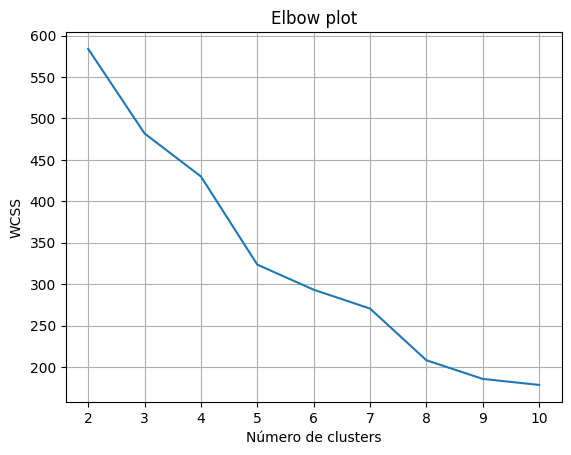

In [254]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(copy_dataset_obesity_fisica)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

CONVIENE 10 CLUSTERS

In [255]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=10, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(copy_dataset_obesity_fisica)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_10 = kmeans.predict(copy_dataset_obesity_fisica)
print(clusters_kmeans_10)

[1 7 2 ... 2 5 2]


In [257]:
# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Cluster': clusters_kmeans_10})



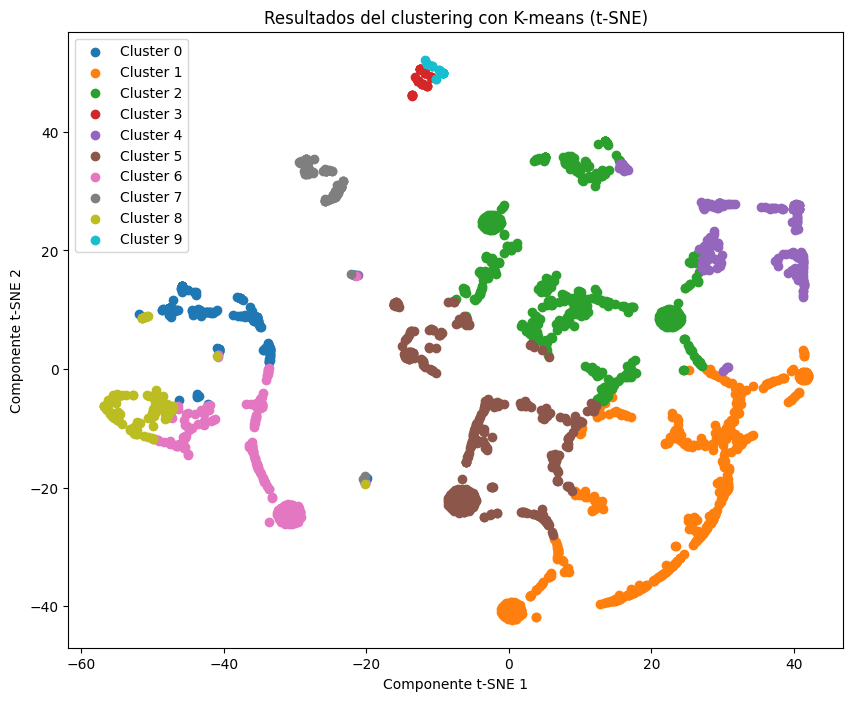

In [259]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(copy_dataset_obesity_fisica)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_10})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(10):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

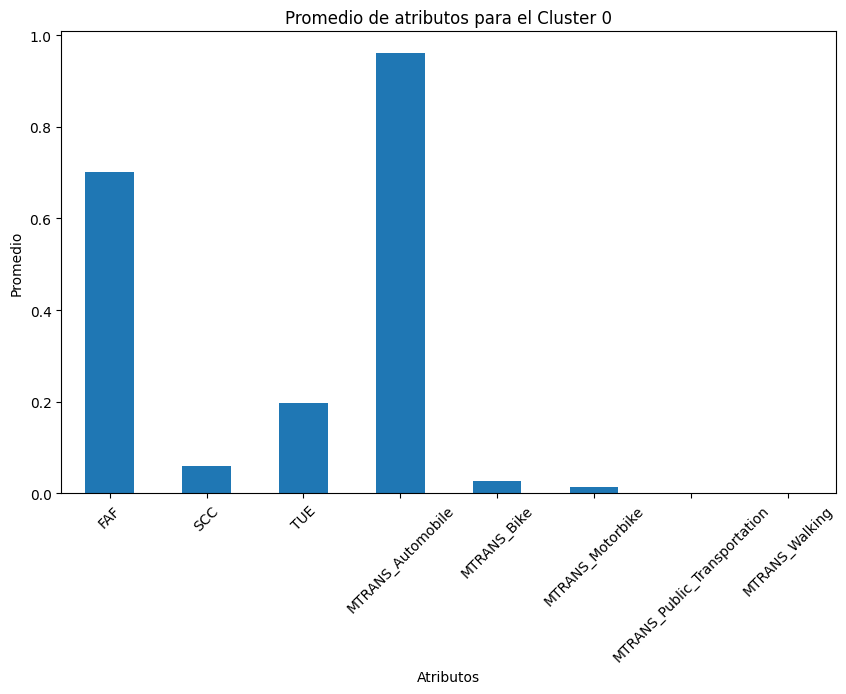

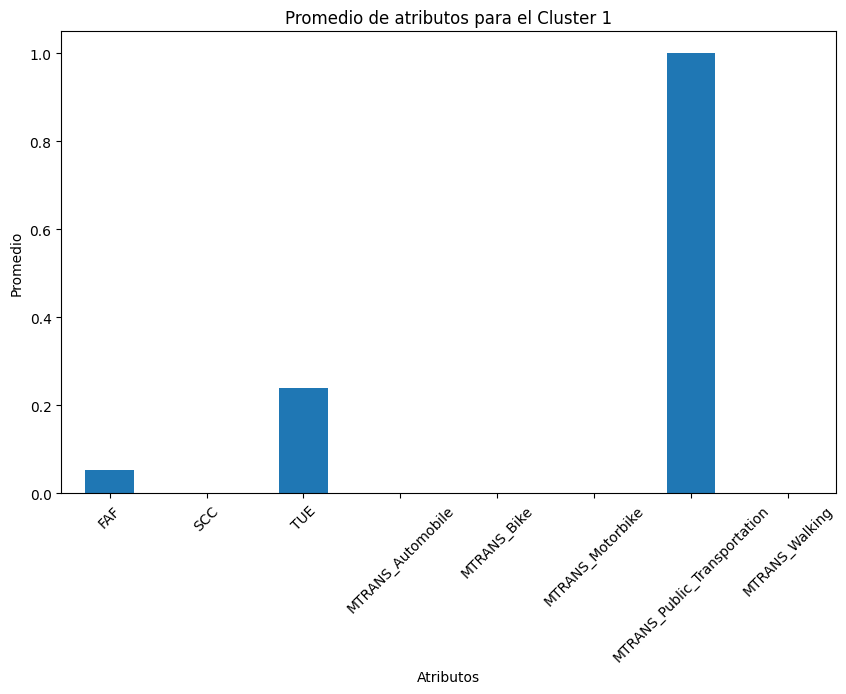

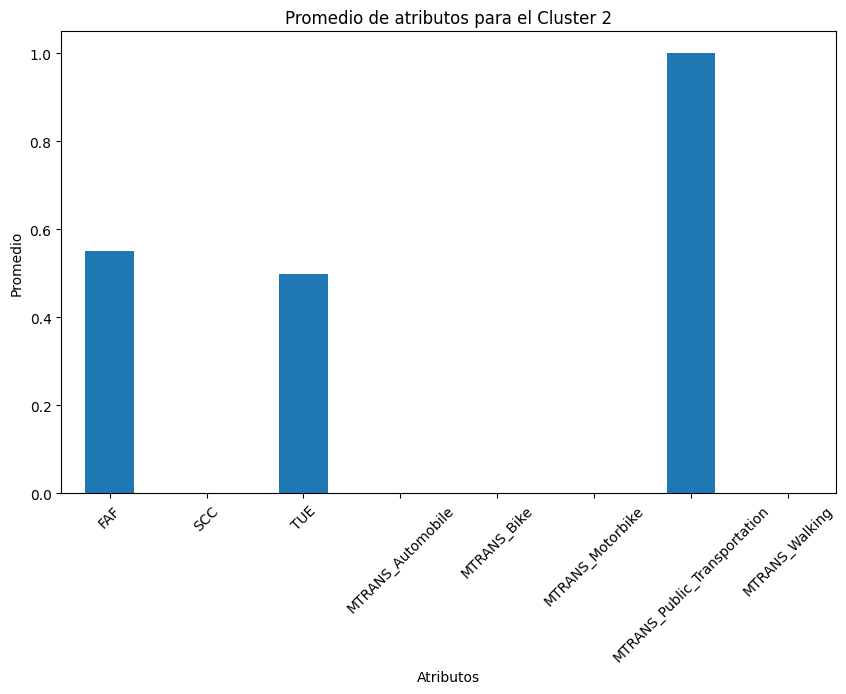

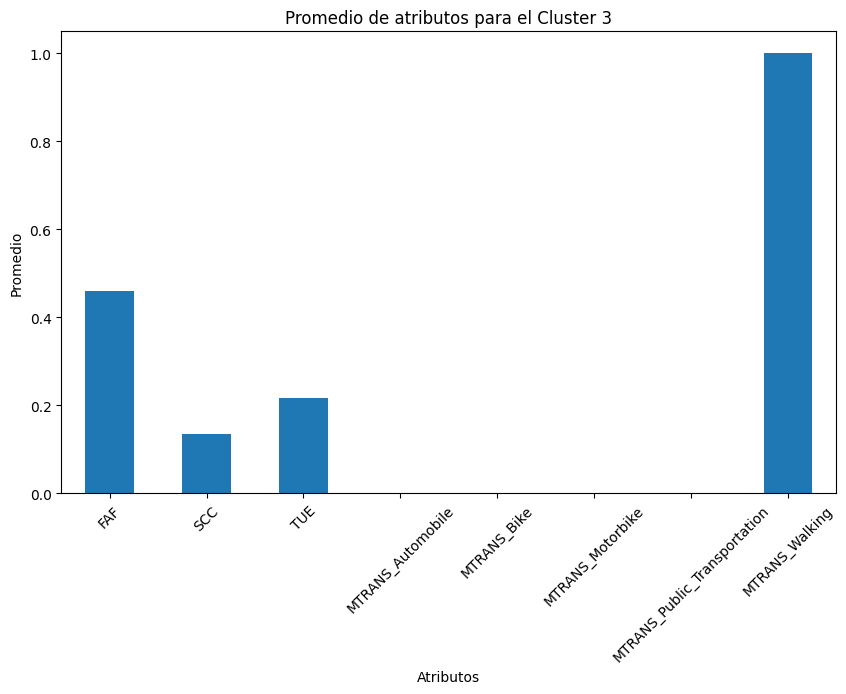

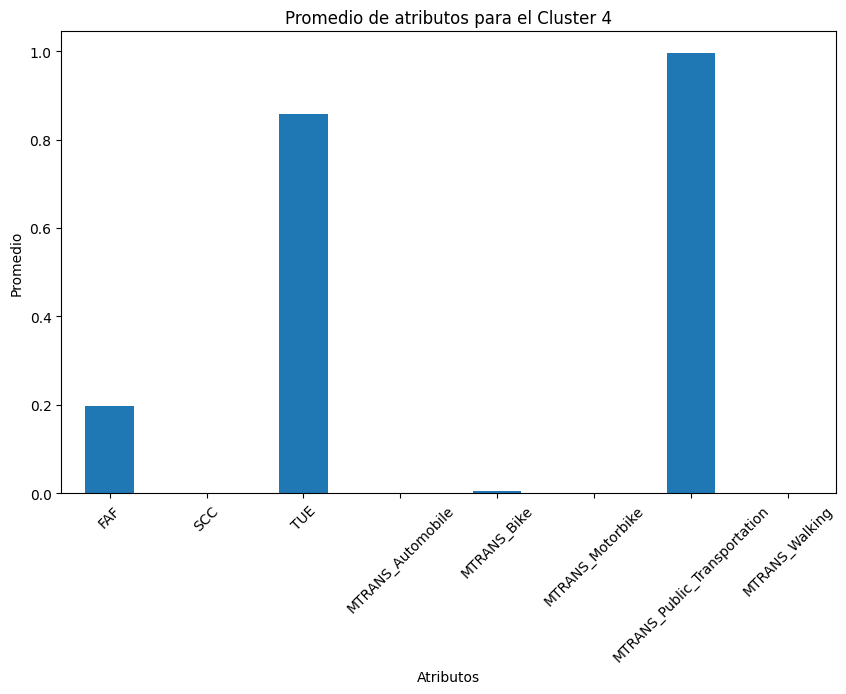

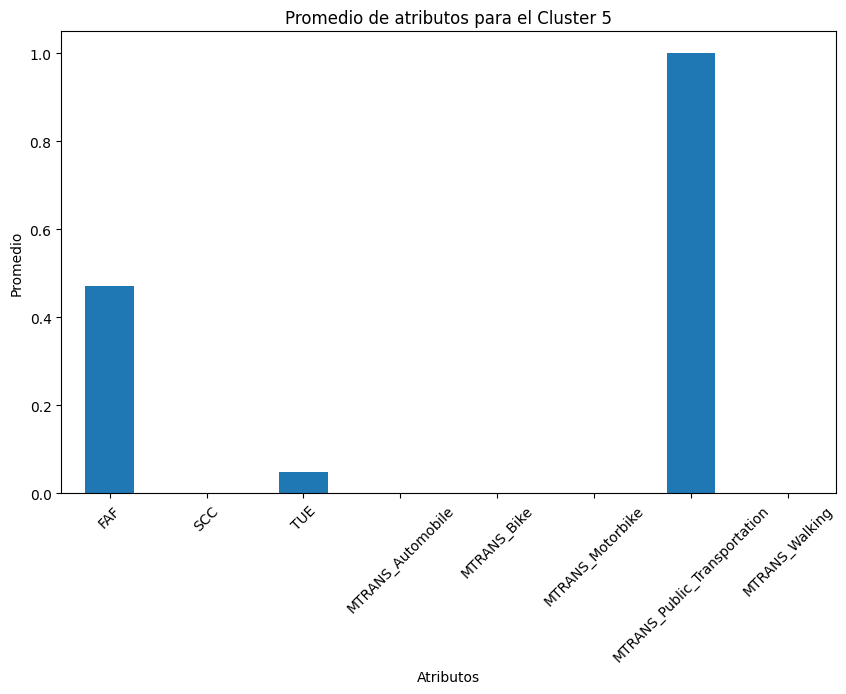

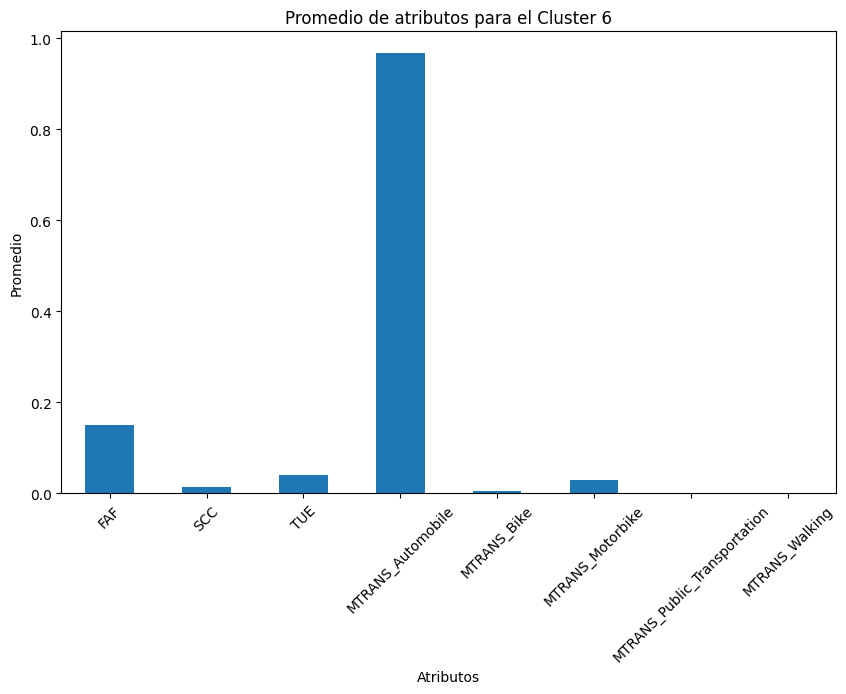

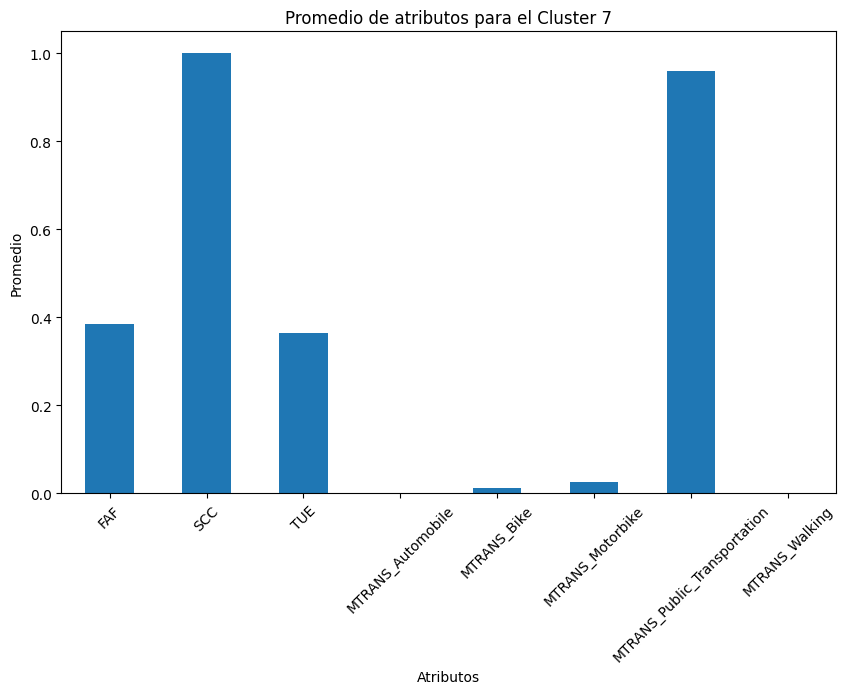

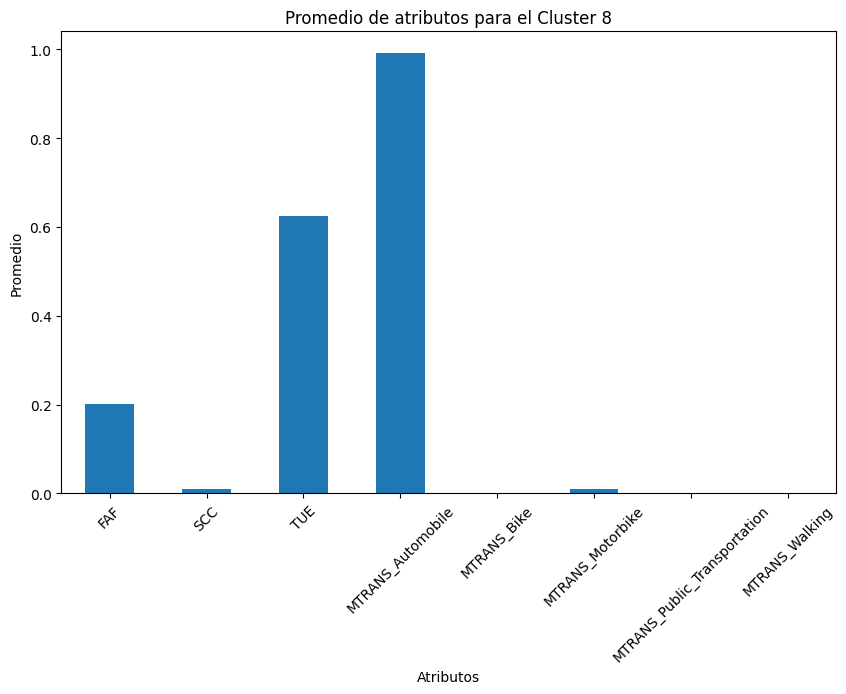

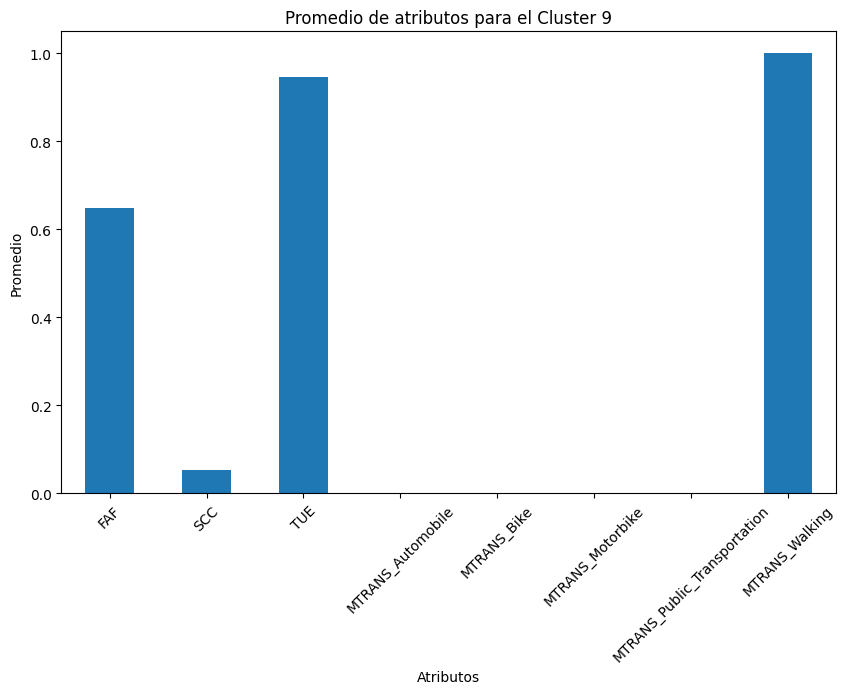

In [260]:
copy_dataset_obesity_fisica['Cluster'] = clusters_kmeans_10

# Calcular los promedios de cada atributo por clúster
cluster_means = copy_dataset_obesity_fisica.groupby('Cluster').mean()

# Graficar los promedios de atributos para cada clúster
for cluster_id in cluster_means.index:
    plt.figure(figsize=(10, 6))
    cluster_means.loc[cluster_id].plot(kind='bar')
    plt.title(f'Promedio de atributos para el Cluster {cluster_id}')
    plt.xlabel('Atributos')
    plt.ylabel('Promedio')
    plt.xticks(rotation=45)
    plt.show()

### ```Que pasa con el tipo de obesidad?```

In [263]:
copy_dataset_obesity_fisica['NObeyesdad'] = copy_dataset_obesity['NObeyesdad'].values
copy_dataset_obesity_fisica = pd.get_dummies(copy_dataset_obesity_fisica, columns=['NObeyesdad'],dtype='int')

,FAF,SCC,TUE,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.000000,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,0,0
1,1.000000,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,7,0,1,0,0,0,0,0
2,0.666667,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,2,0,1,0,0,0,0,0
3,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,3,0,0,0,0,0,1,0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.558756,0.0,0.453124,0.0,0.0,0.0,1.0,0.0,2,0,0,0,0,1,0,0
2107,0.447130,0.0,0.299635,0.0,0.0,0.0,1.0,0.0,2,0,0,0,0,1,0,0
2108,0.471403,0.0,0.323144,0.0,0.0,0.0,1.0,0.0,2,0,0,0,0,1,0,0
2109,0.379702,0.0,0.293017,0.0,0.0,0.0,1.0,0.0,5,0,0,0,0,1,0,0


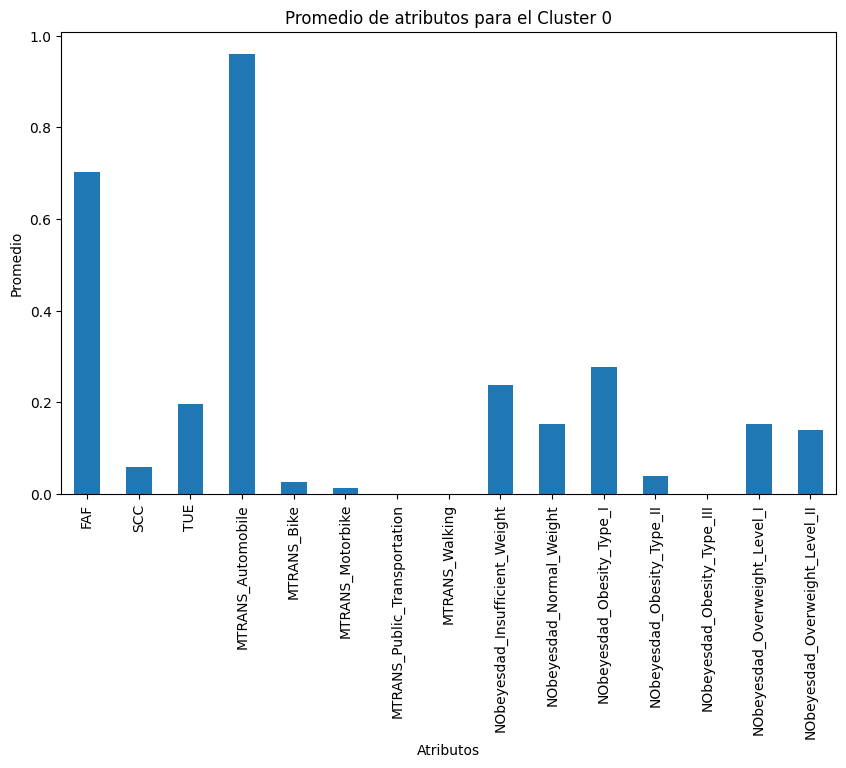

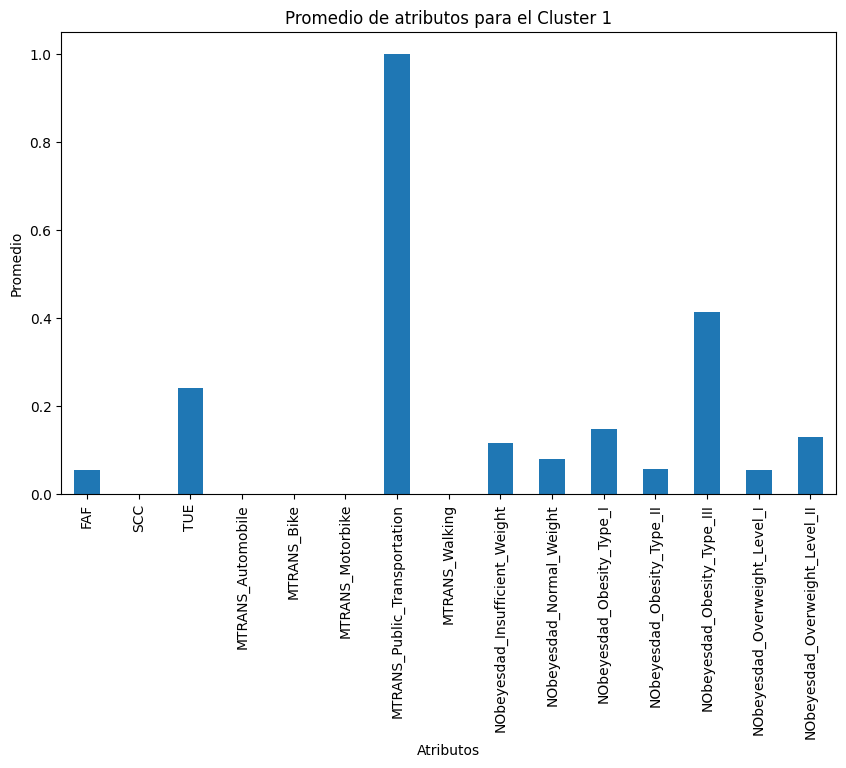

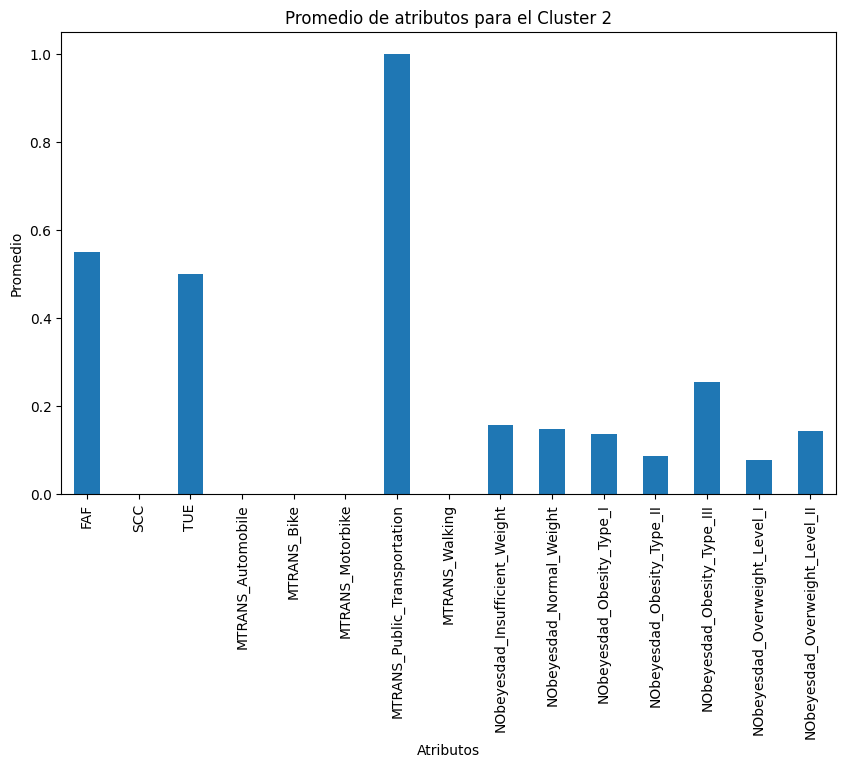

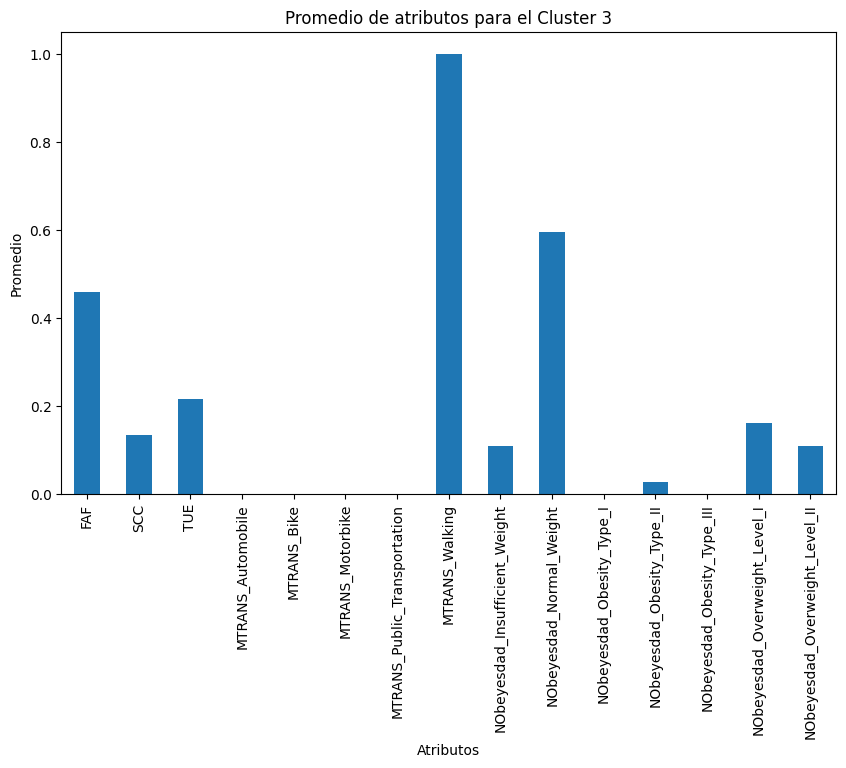

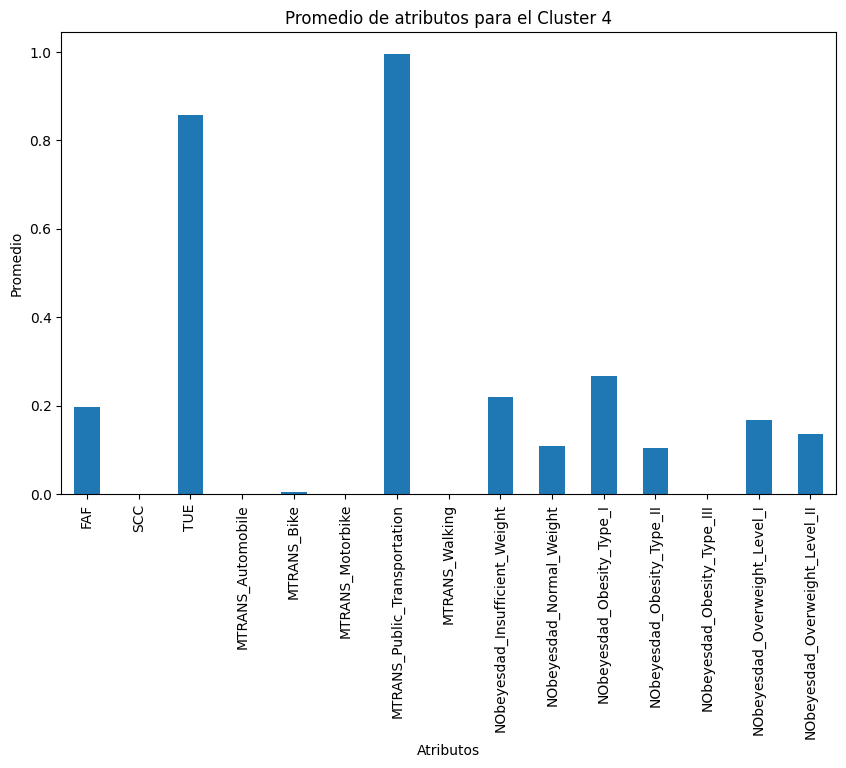

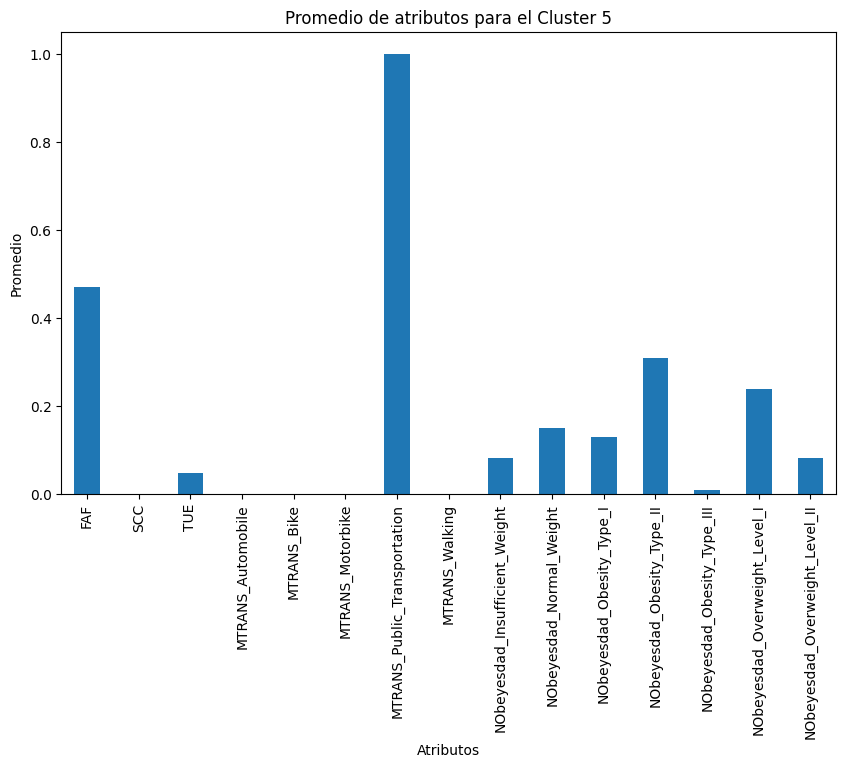

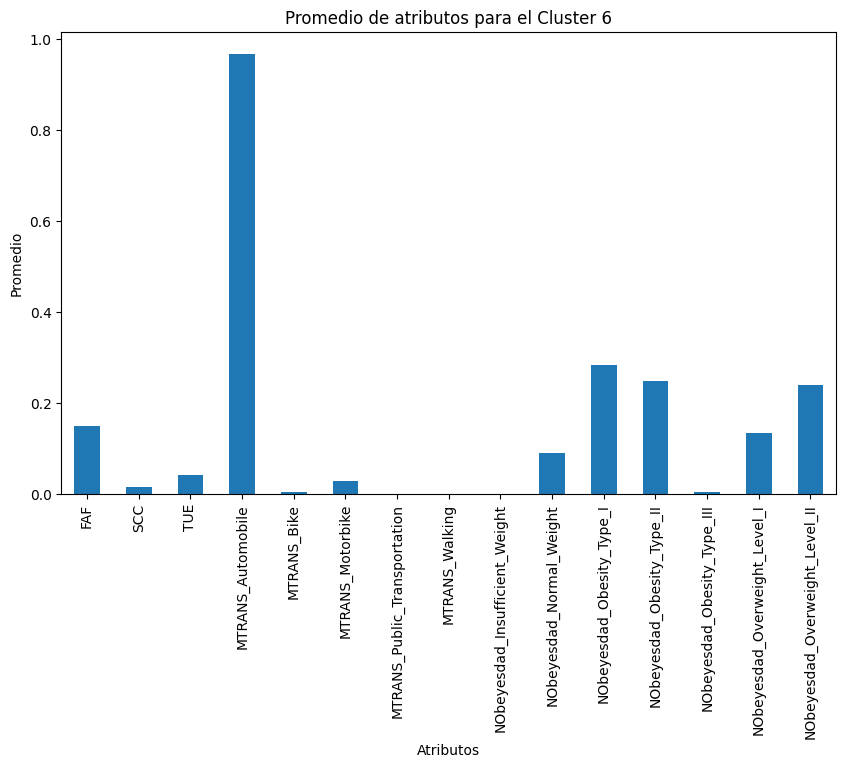

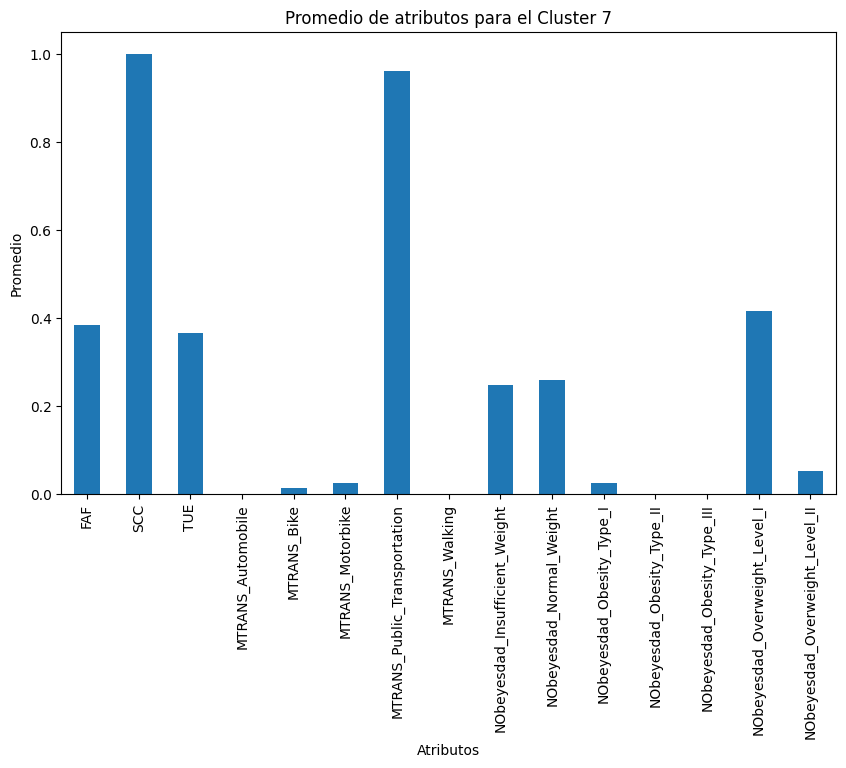

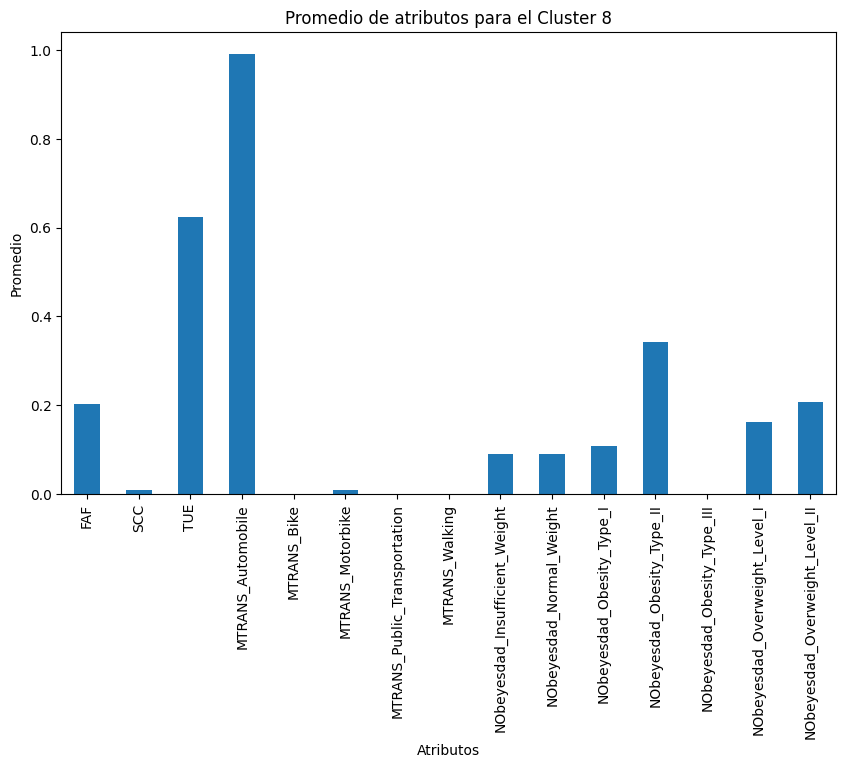

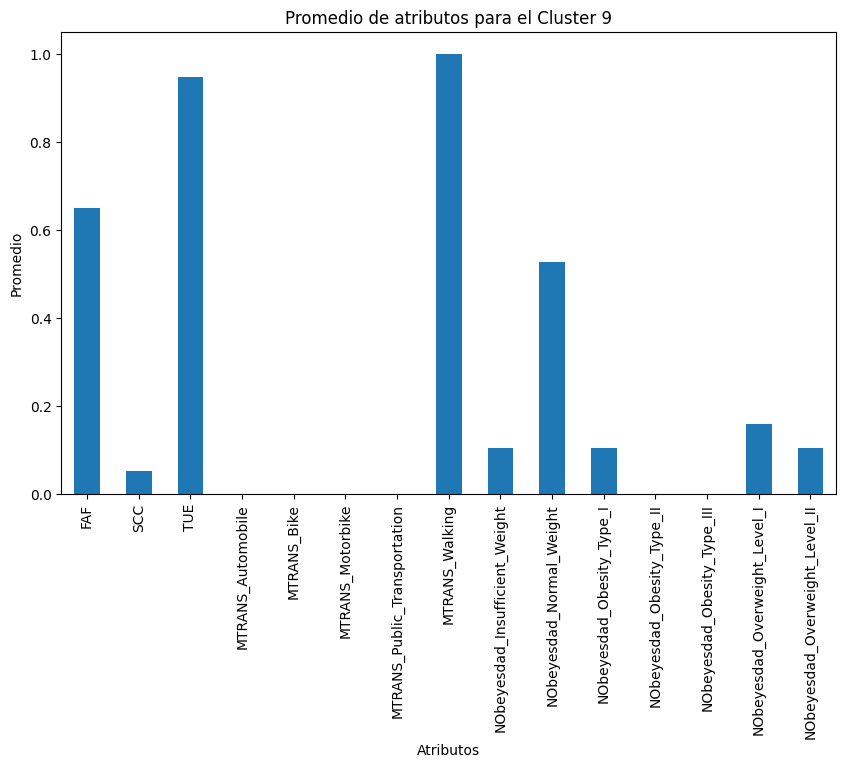

In [267]:
# Calcular los promedios de cada atributo por clúster
cluster_means = copy_dataset_obesity_fisica.groupby('Cluster').mean()
# Graficar los promedios de atributos para cada clúster
for cluster_id in cluster_means.index:
    plt.figure(figsize=(10, 6))
    cluster_means.loc[cluster_id].plot(kind='bar')
    plt.title(f'Promedio de atributos para el Cluster {cluster_id}')
    plt.xlabel('Atributos')
    plt.ylabel('Promedio')
    plt.show()

SE VE QUE LOS CLUSTER CON MAYOR NIVELES DE TRANSPORTE A PIE SON LOS QUE TIENEN PERSONAS CON PESO MAS NORMAL! O POR LO MENOS LO HAY MAS QUE EL RESTO DE CLUSTER Y ESTOS CLUSTERS SON: CLUSTER 3 Y 9, Y LAS QUE TIENEN MAS TRANSPORTE EL AUTO SON LAS QUE MAS OBESIDAD TIENEN!